# Système de partage de vélos à Séoul
![alt text](SeoulBike.png "Système de partage de vélos à Séoul")

## Objectif
> L'objectif de ce jeu de données est de déterminer le nombre optimal de vélos nécessaires pour répondre à la demande.

## Importation
### Librairie Python

In [1]:
# Imports
# python libs

import json
import pickle

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [12, 5]
plt.rcParams['figure.dpi']     = 200 
plt.rcParams['font.size']      = 7.5  
import seaborn as sns

import sklearn # pourquoi importer directement la librairie?
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, ShuffleSplit

from sklearn.utils import all_estimators
from sklearn.linear_model import LinearRegression, ElasticNet, HuberRegressor, BayesianRidge, ARDRegression, SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

## Jeu de données

Le jeu de données [Seoul bike sharing demand dataset](https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand) est disponible sur le site *UCI Machine Learning Repository.*

###### Abstract (eng):
The dataset contains count of public bikes rented at each hour in Seoul Bike haring System with the corresponding Weather data and Holidays information

###### Dataset information (eng):
Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.<br>

###### Informations complémentaires:
Ce jeu de données est constitué de **8760** lignes ~~ou instances~~ et de **14** colonnes ~~ou attributs~~. C'est un jeu de données où l'on doit faire de la **régression** car on doit déterminer un nombre de vélos.


On procède à des modifications:

* Premièrement, on importe le jeu de données dans le Notebook.
* Deuxièment, on traduit le nom des colonnes en français.
* Troisièmement, on traduit en françaisn les variables catégorielles.

### 1)

In [2]:
df = pd.read_csv("SeoulBikeData.csv")
df

Date  Rented Bike Count  Hour  Temperature(�C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(�C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

### 2)

In [3]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(�C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(�C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [4]:
cols = {"Rented Bike Count": "Nombre de vélos loués",
        "Hour": "Heure",
        "Temperature(�C)": "Température(°C)",
        "Humidity(%)": "Humidité(%)",
        "Wind speed (m/s)": "Vitesse du vent(m/s)",
        "Visibility (10m)": "Visibilité(10m)",
        "Dew point temperature(�C)": "Température du point de rosée(°C)",
        "Solar Radiation (MJ/m2)": "Radiation solaire(MJ/m2)",
        "Rainfall(mm)": "Précipitations(mm)",
        "Snowfall (cm)": "Chute de neige(cm)",
        "Seasons": "Saisons",
        "Holiday": "Vacance",
        "Functioning Day": "Jour de fonctionnement"}

df = df.rename(columns = cols)

On vérifie qu'il y a bien eu les modifications.

In [5]:
df.columns

Index(['Date', 'Nombre de vélos loués', 'Heure', 'Température(°C)',
       'Humidité(%)', 'Vitesse du vent(m/s)', 'Visibilité(10m)',
       'Température du point de rosée(°C)', 'Radiation solaire(MJ/m2)',
       'Précipitations(mm)', 'Chute de neige(cm)', 'Saisons', 'Vacance',
       'Jour de fonctionnement'],
      dtype='object')

### 3)
Les colonnes qui possèdent des variables catégorielles sont 'Saisons', 'Vacance', et 'Jour de fonctionnement'.<br>
On commence à analyser les différentes valeurs quelles peuvent prendre.

In [6]:
df["Saisons"].unique(),\
df["Vacance"].unique(),\
df["Jour de fonctionnement"].unique()

(array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object),
 array(['No Holiday', 'Holiday'], dtype=object),
 array(['Yes', 'No'], dtype=object))

Ensuite on procède à la traduction sur ces 3 colonnes.

In [7]:
df["Saisons"] = df["Saisons"].replace({"Winter": "hiver", "Spring": "printemps", "Summer": "été", "Autumn": "automne"})
df["Vacance"] = df["Vacance"].replace({"No Holiday": "pas de vacance", "Holiday": "vacance"})
df["Jour de fonctionnement"] = df["Jour de fonctionnement"].replace({"Yes": "oui", "No": "non"})

On procède à une vérification des modifications.

In [8]:
df["Saisons"].unique(),\
df["Vacance"].unique(),\
df["Jour de fonctionnement"].unique()

(array(['hiver', 'printemps', 'été', 'automne'], dtype=object),
 array(['pas de vacance', 'vacance'], dtype=object),
 array(['oui', 'non'], dtype=object))

En analysant le Dataframe, on se rend compte que:<br>
* les  noms des colonnes sont trop longs avec des caractères spéciaux et des majuscules.
* les colonnes 'Vacance' et 'Jour de fonctionnement' sont de type booléen.
* la date est au format dd/mm/yyyy.

On va donc procéder à des simplifications.<br>
1) On commence par simplifier les noms des colonnes

In [9]:
col_simp = [
    "date",       # Date
    "n_velos",    # Nombre de vélos loués
    "heure",      # Heure
    "temp",       # Température(°C)
    "humidite",   # Humidité(%)
    "vent",       # Vitesse du vent(m/s)
    "visibilite", # Visibilité(10m)
    "rosee",      # Température du point de rosée(°C)
    "soleil",     # Radiation solaire(MJ/m2)
    "pluie",      # Précipitations(mm)
    "neige",      # Chute de neige(cm)
    "saisons",    # Saisons
    "vacance",    # Vacance
    "fonct"       # Jour de fonctionnement
]

df.columns = col_simp

2) On remplace les valeurs vacance et oui par 1, et pas de vacance et non par 0.

In [10]:
df["vacance"] = (df["vacance"] == "vacance").astype(int)
df["fonct"] = (df["fonct"] == "oui").astype(int)

3) On convertit la colonne 'date' au type date.

In [11]:
df["date"] = pd.to_datetime(df["date"], format="%d/%m/%Y")

## Analyses et prétraitement

In [12]:
df.describe()

n_velos        heure         temp     humidite         vent  \
count  8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean    704.602055    11.500000    12.882922    58.226256     1.724909   
std     644.997468     6.922582    11.944825    20.362413     1.036300   
min       0.000000     0.000000   -17.800000     0.000000     0.000000   
25%     191.000000     5.750000     3.500000    42.000000     0.900000   
50%     504.500000    11.500000    13.700000    57.000000     1.500000   
75%    1065.250000    17.250000    22.500000    74.000000     2.300000   
max    3556.000000    23.000000    39.400000    98.000000     7.400000   

        visibilite        rosee       soleil        pluie        neige  \
count  8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean   1436.825799     4.073813     0.569111     0.148687     0.075068   
std     608.298712    13.060369     0.868746     1.128193     0.436746   
min      27.000000   -30.600000     0.000000     0.000000     0.000000   
25%     940.000000    -4.700000     0.000000     0.000000     0.000000   
50%    1698.000000     5.100000     0.010000     0.000000     0.000000   
75%    2000.000000    14.800000     0.930000     0.000000     0.000000   
max    2000.000000    27.200000     3.520000    35.000000     8.800000   

           vacance        fonct  
count  8760.000000  8760.000000  
mean      0.049315     0.966324  
std       0.216537     0.180404  
min       0.000000     0.000000  
25%       0.000000     1.000000  
50%       0.000000     1.000000  
75%       0.000000     1.000000  
max       1.000000     1.000000

### Données manquantes
On commence par vérifier si il y a des données manquantes dans le DataFrame.

In [13]:
df.isnull().sum().reset_index(name="NA_count").sort_values(by="NA_count", ascending=False)

index  NA_count
0         date         0
1      n_velos         0
2        heure         0
3         temp         0
4     humidite         0
5         vent         0
6   visibilite         0
7        rosee         0
8       soleil         0
9        pluie         0
10       neige         0
11     saisons         0
12     vacance         0
13       fonct         0

On remarque qu'il n'y a pas de données manquantes dans le DataFrame.

### Jour de fonctionnement
Cette colonne informe si pour une heure donnée il y a un fonctionnement du système.<br>
On peut donc se poser la question, est-il pertinent de garder les heures qui correspondent à un non fonctionnement du système, sachant que l'objectif de ce travail est de prédire le nombre de vélos empruntés par heure. (voir Dataset information).

In [14]:
df.groupby(["fonct"]).agg({"n_velos": ["max", "mean", "std"]}).reset_index()

fonct n_velos                        
            max        mean         std
0     0       0    0.000000    0.000000
1     1    3556  729.156999  642.351166

On remarque que lorsque qu'il n'y a pas de fonctionnement, il n'y a pas de vélos en service. En effet, la moyenne est à zéro. Ce résultats semble cohérent dans la mesure où les vélos sont utilisés uniquement sur les heures de fonctionnement. On peut supprimer toutes les lignes qui correspondent à des heures de non fonctionnement.

In [15]:
print(f"Nombre de lignes du jeu de données avant suppression des heures de non fonctionnement: {len(df)}")
df = df[df["fonct"] == 1].drop("fonct", axis=1)
print(f"Nombre de lignes du jeu de données après suppression des heures de non fonctionnement: {len(df)}")

Nombre de lignes du jeu de données avant suppression des heures de non fonctionnement: 8760
Nombre de lignes du jeu de données après suppression des heures de non fonctionnement: 8465


On affiche de nouveau les principales informations du jeu de données.

In [16]:
df.describe()

n_velos        heure         temp     humidite         vent  \
count  8465.000000  8465.000000  8465.000000  8465.000000  8465.000000   
mean    729.156999    11.507029    12.771057    58.147194     1.725883   
std     642.351166     6.920899    12.104375    20.484839     1.034281   
min       2.000000     0.000000   -17.800000     0.000000     0.000000   
25%     214.000000     6.000000     3.000000    42.000000     0.900000   
50%     542.000000    12.000000    13.500000    57.000000     1.500000   
75%    1084.000000    18.000000    22.700000    74.000000     2.300000   
max    3556.000000    23.000000    39.400000    98.000000     7.400000   

        visibilite        rosee       soleil       pluie        neige  \
count  8465.000000  8465.000000  8465.000000  8465.00000  8465.000000   
mean   1433.873479     3.944997     0.567868     0.14912     0.077685   
std     609.051229    13.242399     0.868245     1.12554     0.444063   
min      27.000000   -30.600000     0.000000     0.00000     0.000000   
25%     935.000000    -5.100000     0.000000     0.00000     0.000000   
50%    1690.000000     4.700000     0.010000     0.00000     0.000000   
75%    2000.000000    15.200000     0.930000     0.00000     0.000000   
max    2000.000000    27.200000     3.520000    35.00000     8.800000   

           vacance  
count  8465.000000  
mean      0.048198  
std       0.214198  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

### Pistes d'exploration:
* ~~On peut regarder le nombre moyen de vélos empruntés lorsqu'il y a des vacances et inversement.~~
* ~~On peut visualiser la distribution des vélos loués lors des différentes heures de la journée.~~
* ~~On peut analyser les effets de la température, de l'humidité, du vent, de la visibilité, de la rosée, du soleil, de la pluie et de la neige sur le nombre de vélos louées car il s'agit d'un moyen de transport en extérieur.~~
* ~~On peut regarder la distribution moyenne des vélos lors des 4 saisons.~~
* ~~On peut mettre en évidence les mois où il y a une forte utilisation des vélos.~~
* ~~Au niveau des dates on peut regarder si il y a des jours spéciaux comme la fête national par exemple.~~ => trop compliqué car il faut aller chercher un calandrier coréen.
* ~~Quel est le nombre de vélos loués par jour de la semaine ? ~~


### Distribution des vélos loués en fonction des heures de la journée

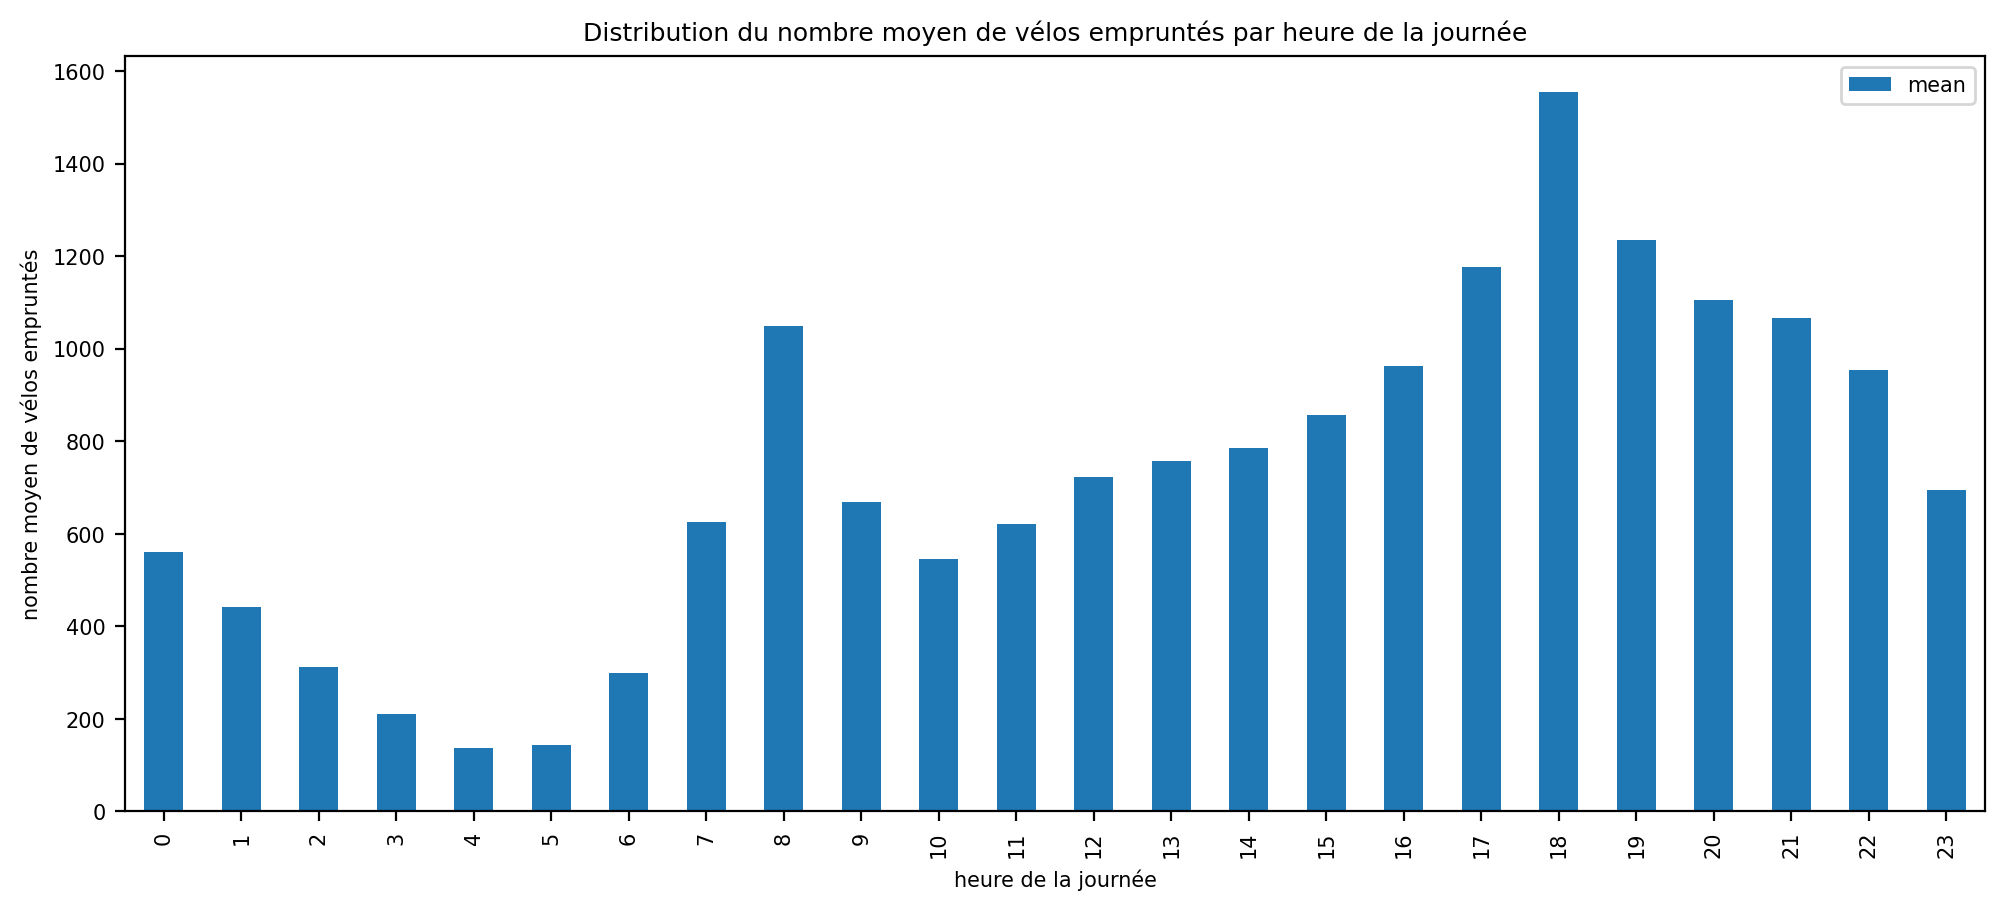

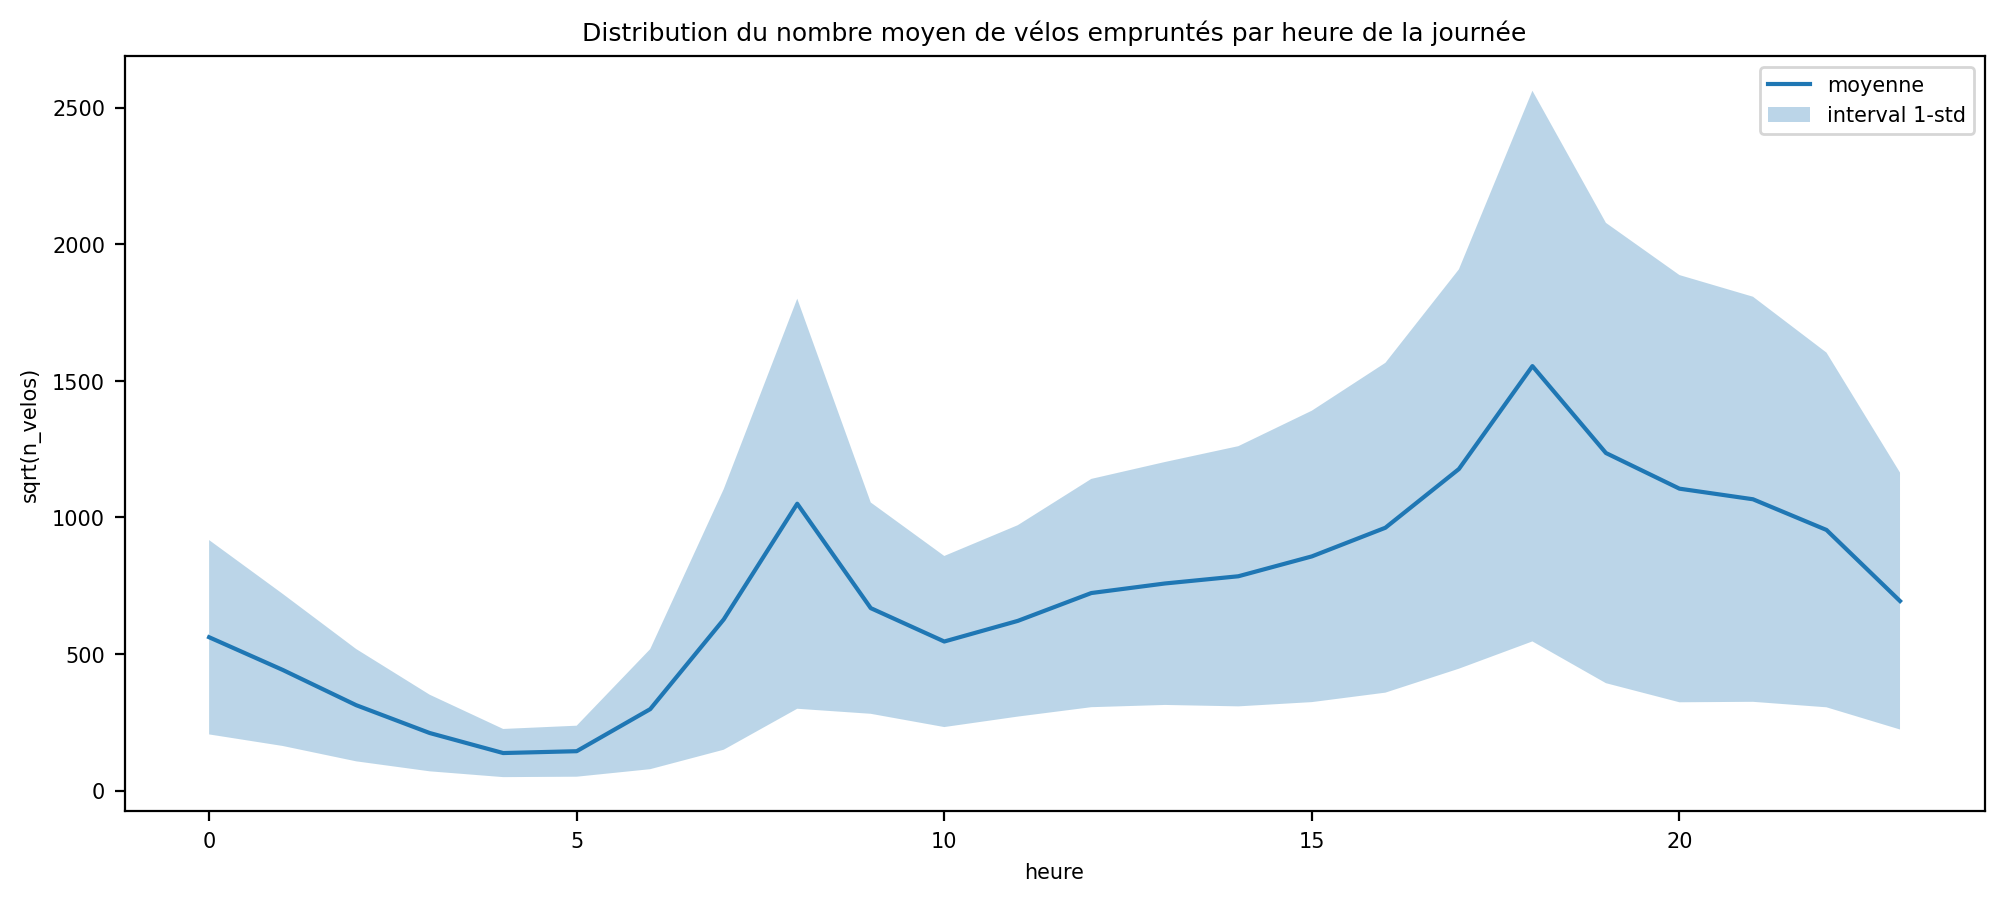

In [17]:
df.groupby(["heure"]).agg({"n_velos": ["mean"]}).reset_index().plot.bar(x="heure", 
                                                                        y="n_velos",
                                                                        title="Distribution du nombre moyen de vélos empruntés par heure de la journée",
                                                                        xlabel="heure de la journée",
                                                                        ylabel="nombre moyen de vélos empruntés")

plt.show()
df_temp = df.groupby("heure").agg({"n_velos": ["mean", "std"]}).reset_index()
mean = df_temp["n_velos"]["mean"]
std = df_temp["n_velos"]["std"]
plt.plot(df_temp["heure"], mean, label="moyenne")
plt.fill_between(df_temp["heure"], mean-std, mean+std, alpha=0.3, label="interval 1-std")
plt.legend()
plt.title("Distribution du nombre moyen de vélos empruntés par heure de la journée")
plt.xlabel("heure")
plt.ylabel("sqrt(n_velos)")
plt.show()

Sur le graphique de la distribution du nombre moyen de vélos empruntés par heure de la journée, on remarque qu'il y a un pic vers 8 heure qui correspond à l'heure de pointe du matin, et un pic vers 18 heure qui corresponf à l'heure de pointe du soir.<br>
Il est à noter que le système de partage de vélos marche 24 heures sur 24.

### Transformation du nombre de vélos loués

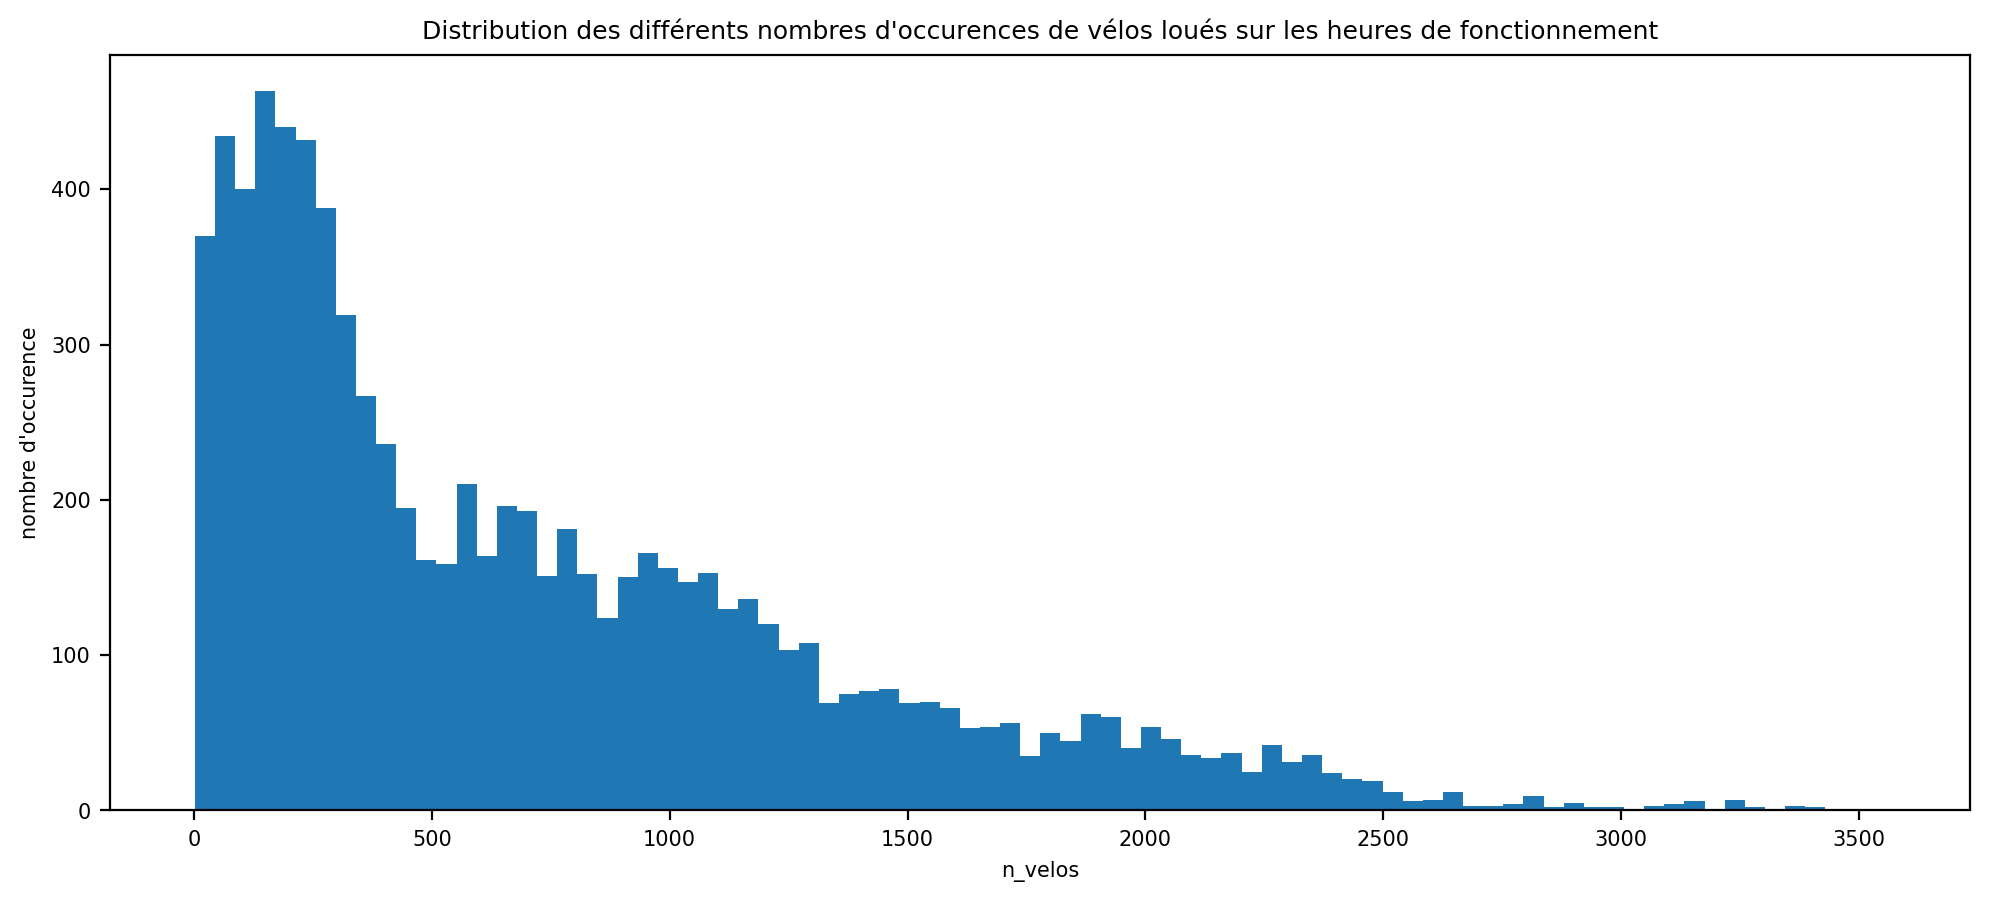

In [18]:
plt.hist(x=df["n_velos"], bins = len(df)//100)
plt.title("Distribution des différents nombres d'occurences de vélos loués sur les heures de fonctionnement")
plt.xlabel("n_velos")
plt.ylabel("nombre d'occurence")
plt.show()

Sur le graphique des distribution des différents nombres d'occurences de vélos loués sur les heures de fonctionnement on remarque que la distribution est asymétrique vers la droite.<br>
On procède à une transformation des valeurs afin d'avoir une distribution qui s'approche d'une distribution gaussienne.<br>
On va utiliser deux approches qui sont la Square Root et la Logarithmic.

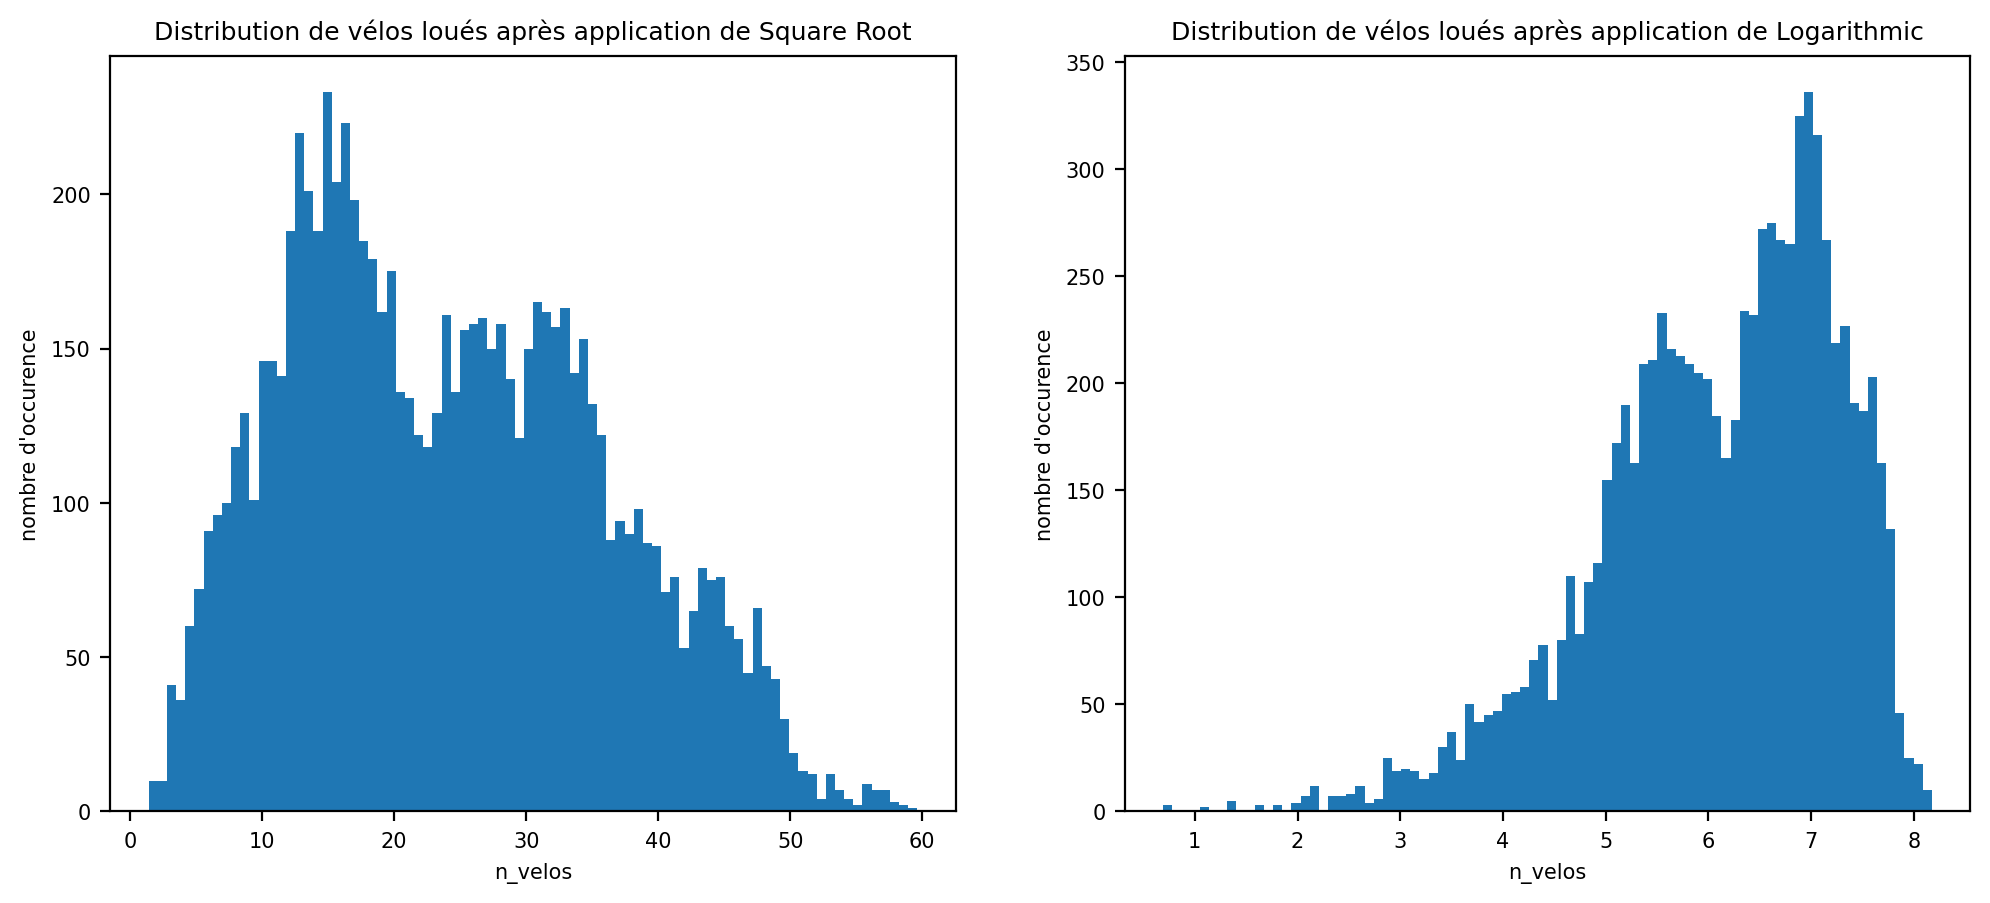

In [19]:
fig, axs = plt.subplots(1,2)

# Square Root
axs[0].hist(x=np.sqrt(df["n_velos"]), bins = len(df)//100)
axs[0].set_title("Distribution de vélos loués après application de Square Root")
axs[0].set_xlabel("n_velos")
axs[0].set_ylabel("nombre d'occurence")

# Logarithmic
axs[1].hist(x=np.log(df["n_velos"]), bins = len(df)//100)
axs[1].set_title("Distribution de vélos loués après application de Logarithmic")
axs[1].set_xlabel("n_velos")
axs[1].set_ylabel("nombre d'occurence")

plt.show()

On remarque que le graphique issu de la transformation Sqare Root est plus adapté car la distribution s'approche plus d'une distribution Gaussienne.

In [20]:
df["n_velos"] = np.sqrt(df["n_velos"])

## Caractéristiques temporelles
Ces caractéristiques prennent aussi en compte les vacances et les saisons.

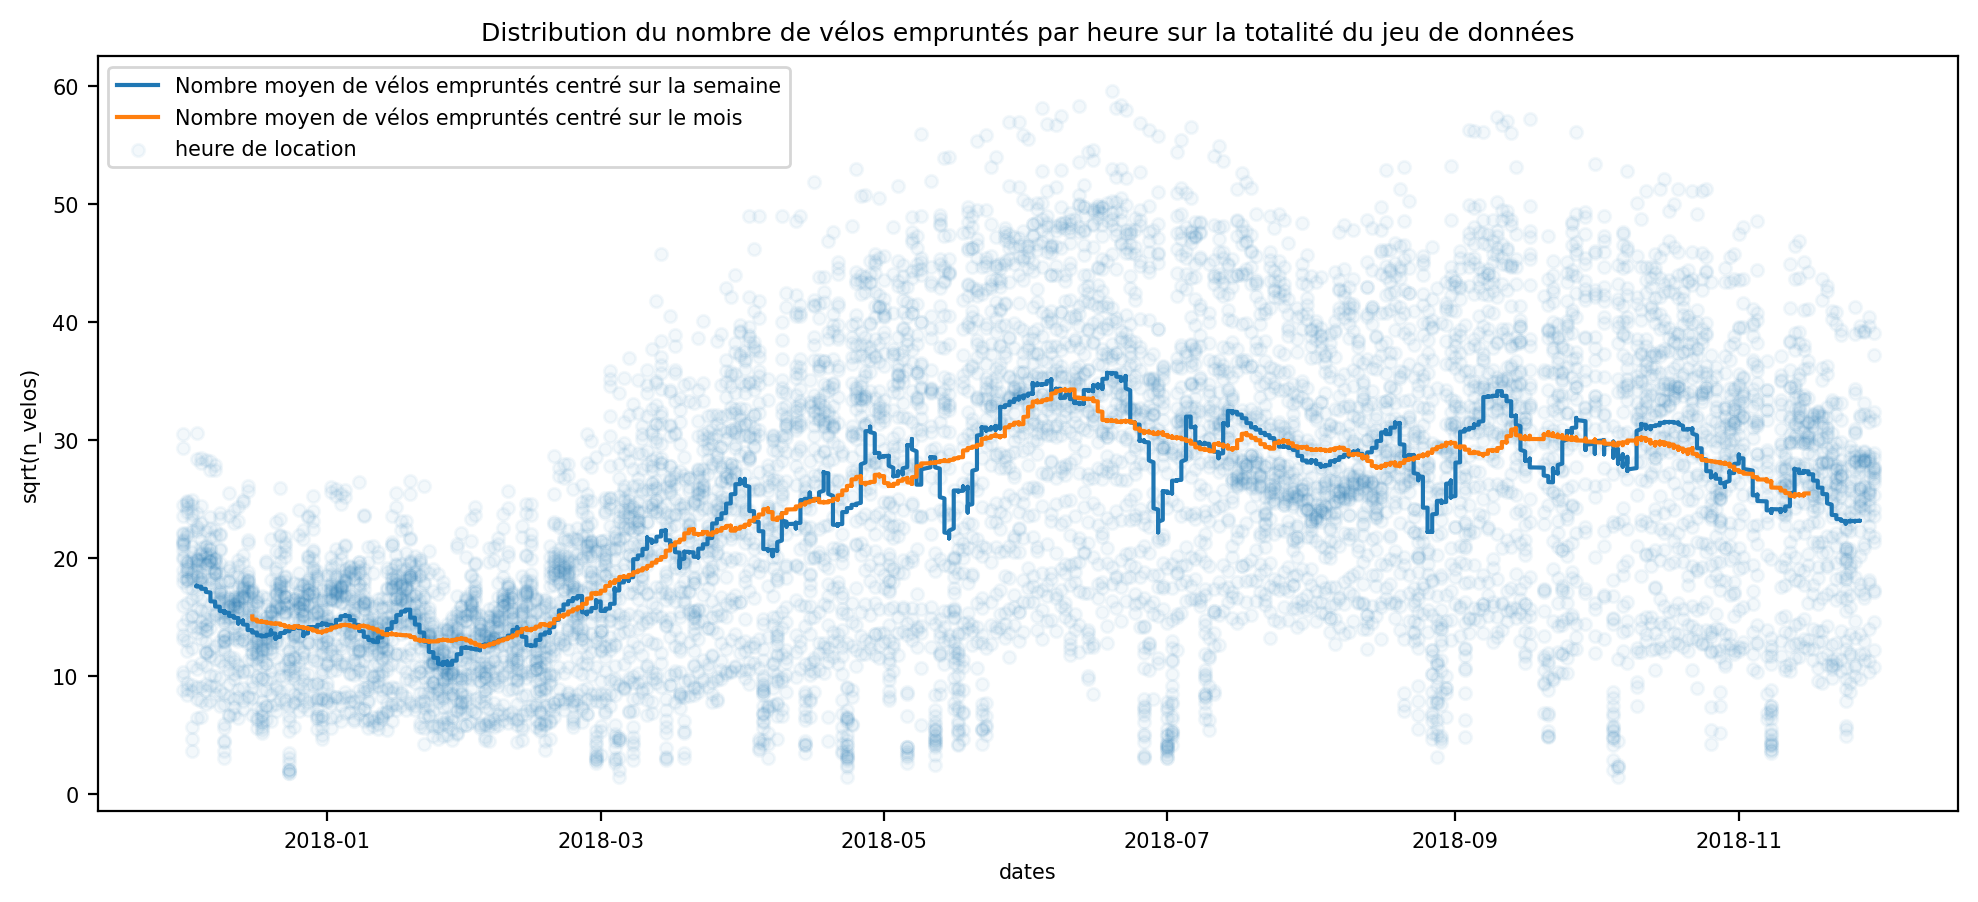

In [21]:
df.plot(x="date", y="n_velos", alpha=0.05, kind="scatter", label="heure de location")
plt.plot(df["date"], df["n_velos"].rolling(7*24, center=True).mean(), label = "Nombre moyen de vélos empruntés centré sur la semaine")
plt.plot(df["date"], df["n_velos"].rolling(30*24, center=True).mean(), label = "Nombre moyen de vélos empruntés centré sur le mois")
plt.legend()
plt.title("Distribution du nombre de vélos empruntés par heure sur la totalité du jeu de données")
plt.xlabel("dates")
plt.ylabel("sqrt(n_velos)")
plt.show()

Sur ce graphique on remarque que le nombre de vélos loués dépend des jours, des mois, et des saisons. En effet, on remarque que lors de la période estivale le nombre de vélos empruntés est plus important que la période hivernale.<br>
Par conséquent on en déduit que le nombre de locations est lié aux conditions extérieurs, notamment la météo.<br>
Pour la suite on va créer de nouvelles colonnes à partir de colonne date, ce qui s'appelle faire du 'feature engineering', qui sont:
* l'année (int)
* le moins (string)
* le jour (int)
* le nom du jour (string)
* est-ce qu'il s'agit d'un jour de travail ? (bool)

In [22]:
df["annee"] = df["date"].dt.year
df["nom_mois"] = df["date"].dt.month_name() 
df["jour"] = df["date"].dt.day
df["nom_jour_sem"] = df["date"].dt.day_name()
df["jour_sem"] = df["date"].dt.dayofweek
df["jour_travail"] = (df["date"].dt.dayofweek < 5).astype(int)

On traduit les mois et les jours en français.

In [23]:
df["nom_mois"] = df["nom_mois"].replace({"December": "décembre", 
                                 "January": "janvier",
                                 "February": "février",
                                 "March": "mars",
                                 "April": "avril",
                                 "May": "mai",
                                 "June": "juin",
                                 "July": "juillet",
                                 "August": "août",
                                 "September": "septembre",
                                 "October": "octobre",
                                 "November": "novembre"})

df["nom_jour_sem"] = df["nom_jour_sem"].replace({"Monday": "lundi",
                                         "Tuesday": "mardi",
                                         "Wednesday": "mercredi",
                                         "Thursday": "jeudi",
                                         "Friday": "vendredi",
                                         "Saturday": "samedi",
                                         "Sunday": "dimanche"})

Une fois qu'on a extrait les informations de la date on peut la supprimer.

In [24]:
df = df.drop("date", axis=1)

### Analyse des jours de la semaine

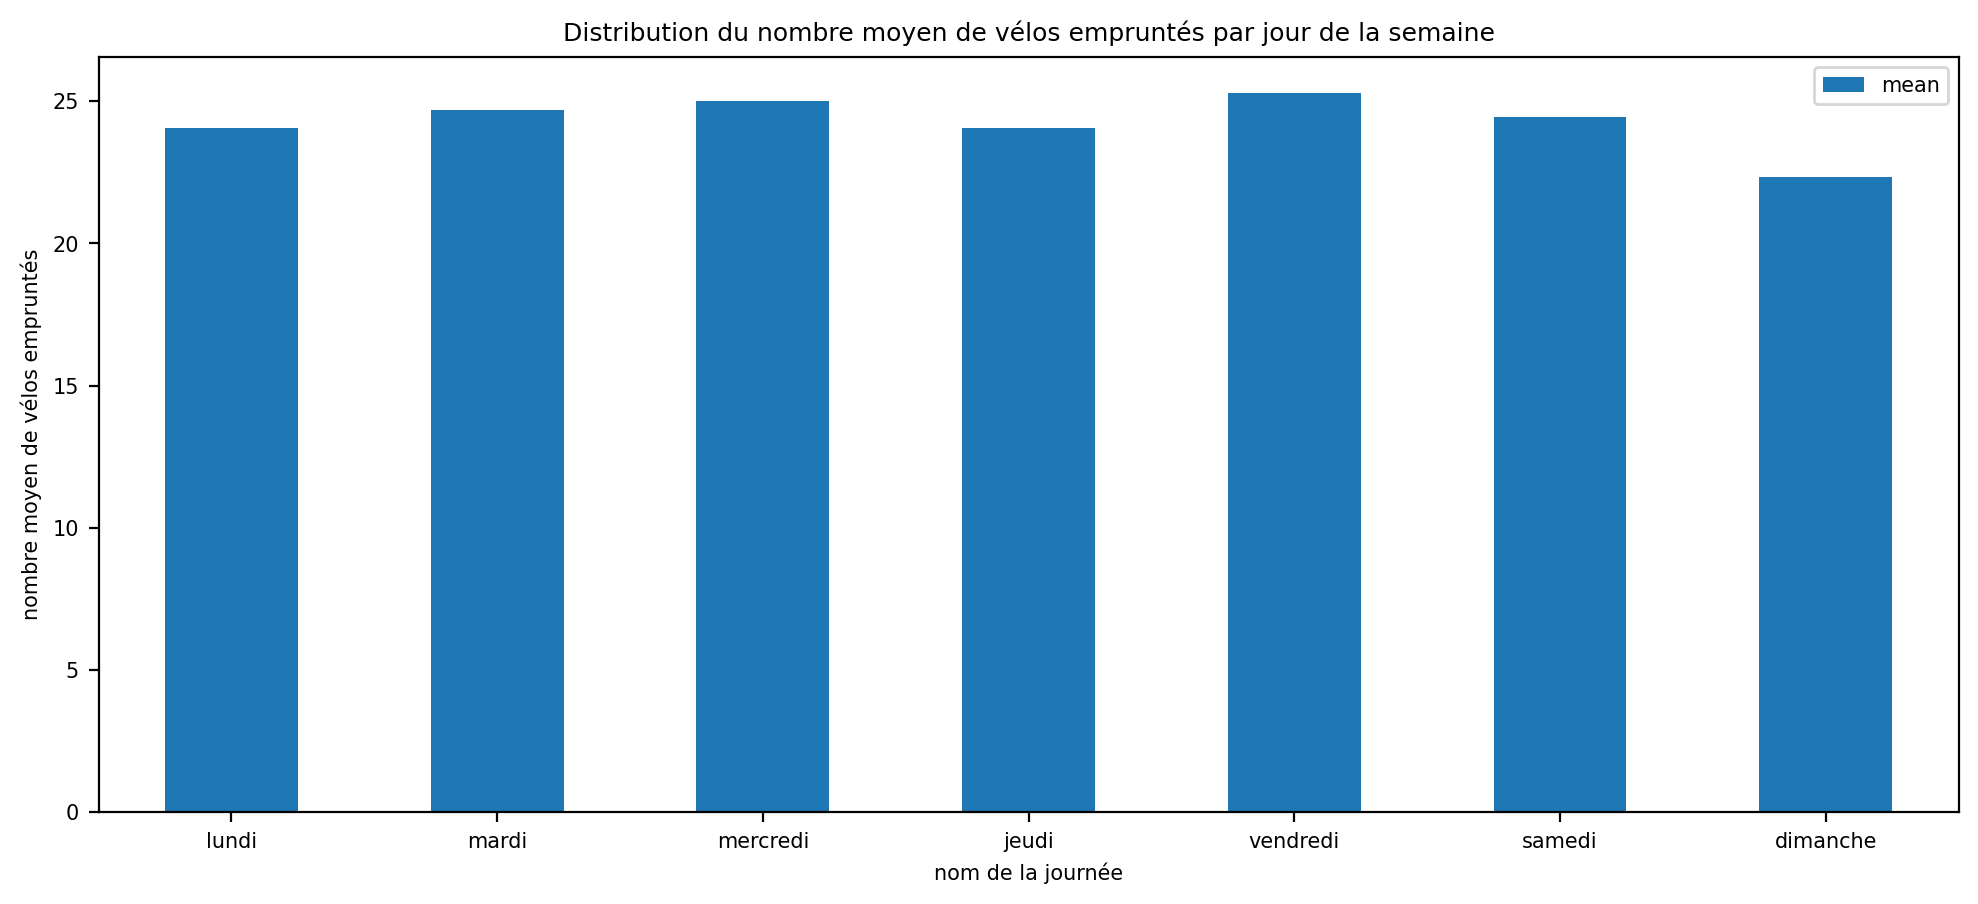

In [25]:
df_temp = df.groupby(["jour_sem", "nom_jour_sem"]).agg({"n_velos": ["mean"]}).reset_index().plot.bar(x="nom_jour_sem", 
                                                                                  y="n_velos",
                                                                                  title="Distribution du nombre moyen de vélos empruntés par jour de la semaine",
                                                                                  xlabel="nom de la journée",
                                                                                  ylabel="nombre moyen de vélos empruntés",
                                                                                  rot=0)


Text(0.5, 1.0, 'Comparaison des distributions par rapport aux journées de travail')

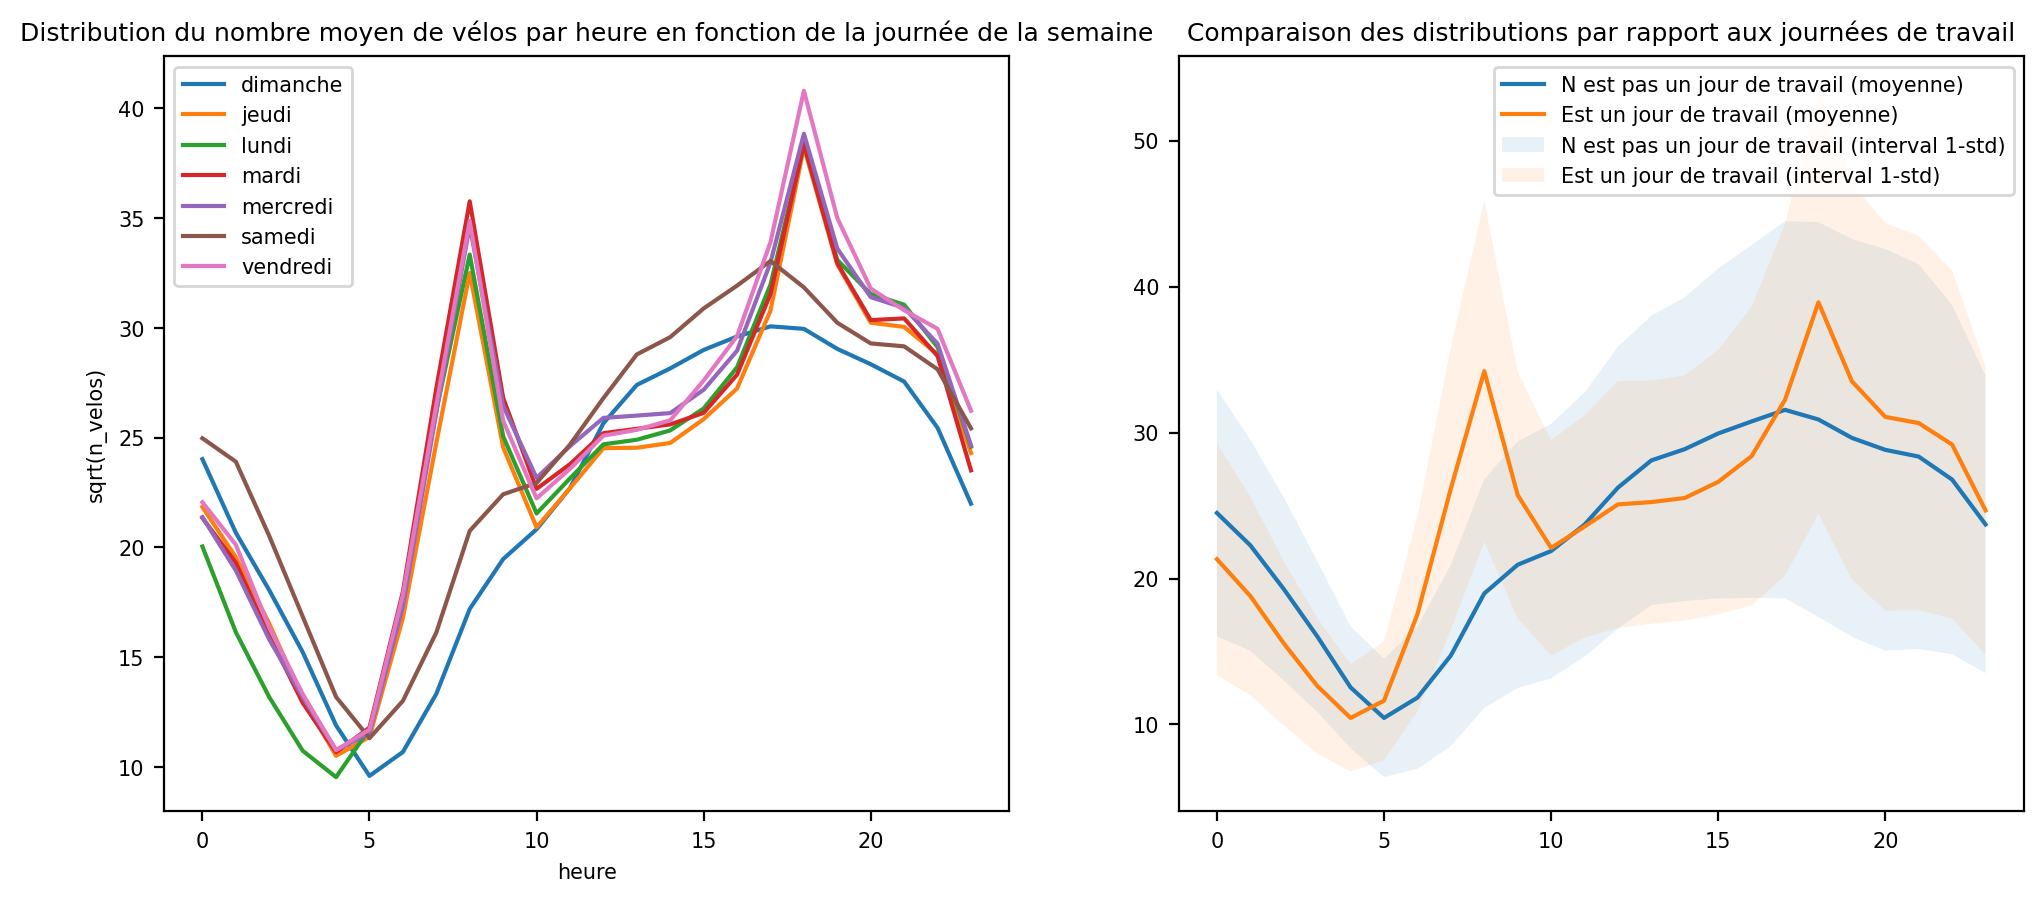

In [26]:
fig, axs = plt.subplots(1,2)

# jours de la semaine
df_temp = df.groupby(["nom_jour_sem", "heure"]).agg({"n_velos":["mean"]}).reset_index()
for jour in df_temp["nom_jour_sem"].unique():
    mean = df_temp[df_temp["nom_jour_sem"] == jour]["n_velos"]["mean"]
    axs[0].plot(df_temp[df_temp["nom_jour_sem"] == jour]["heure"], mean, label = f"{jour}")
axs[0].legend()
axs[0].set_title("Distribution du nombre moyen de vélos par heure en fonction de la journée de la semaine")
axs[0].set_xlabel("heure")
axs[0].set_ylabel("sqrt(n_velos)")

# jours de travail
df_temp = df.groupby(["jour_travail", "heure"]).agg({"n_velos": ["mean", "std"]}).reset_index()
for travail in df_temp["jour_travail"].unique():
    mean = df_temp[df_temp["jour_travail"] == travail]["n_velos"]["mean"]
    std =  df_temp[df_temp["jour_travail"] == travail]["n_velos"]["std"]
    axs[1].plot(df_temp[df_temp["jour_travail"] == travail]["heure"], mean, label=f'{"Est" if travail else "N est pas"} un jour de travail (moyenne)')
    axs[1].fill_between(df_temp[df_temp["jour_travail"] == travail]["heure"], mean-std, mean+std, alpha=0.1, label=f'{"Est" if travail else "N est pas"} un jour de travail (interval 1-std)')
axs[1].legend()
axs[1].set_title("Comparaison des distributions par rapport aux journées de travail")

Sur ce graphique on remarque que les jours où les vélos sont le plus utilisés sont des jours de de la semaine comme mercredi et vendredi. Il est à noter que le lundi et le mardi, le nombre de location moyenne est inférieure à celle du samedi. De plus, on remarque que le samedi est jour où il y a une importante utilisation. Enfin, on remarque que le dimanche le nombre de location est le plus bas.<br>
On remarque qu'il y a une difference entre les jours de la semaine (du lundi au vendredi) et ceux du week-end.

### Distribution du nombre moyen de vélos dans le mois

In [27]:
df.head()

n_velos  heure  temp  humidite  vent  visibilite  rosee  soleil  pluie  \
0  15.937377      0  -5.2        37   2.2        2000  -17.6     0.0    0.0   
1  14.282857      1  -5.5        38   0.8        2000  -17.6     0.0    0.0   
2  13.152946      2  -6.0        39   1.0        2000  -17.7     0.0    0.0   
3  10.344080      3  -6.2        40   0.9        2000  -17.6     0.0    0.0   
4   8.831761      4  -6.0        36   2.3        2000  -18.6     0.0    0.0   

   neige saisons  vacance  annee  nom_mois  jour nom_jour_sem  jour_sem  \
0    0.0   hiver        0   2017  décembre     1     vendredi         4   
1    0.0   hiver        0   2017  décembre     1     vendredi         4   
2    0.0   hiver        0   2017  décembre     1     vendredi         4   
3    0.0   hiver        0   2017  décembre     1     vendredi         4   
4    0.0   hiver        0   2017  décembre     1     vendredi         4   

   jour_travail  
0             1  
1             1  
2             1  
3             1  
4             1

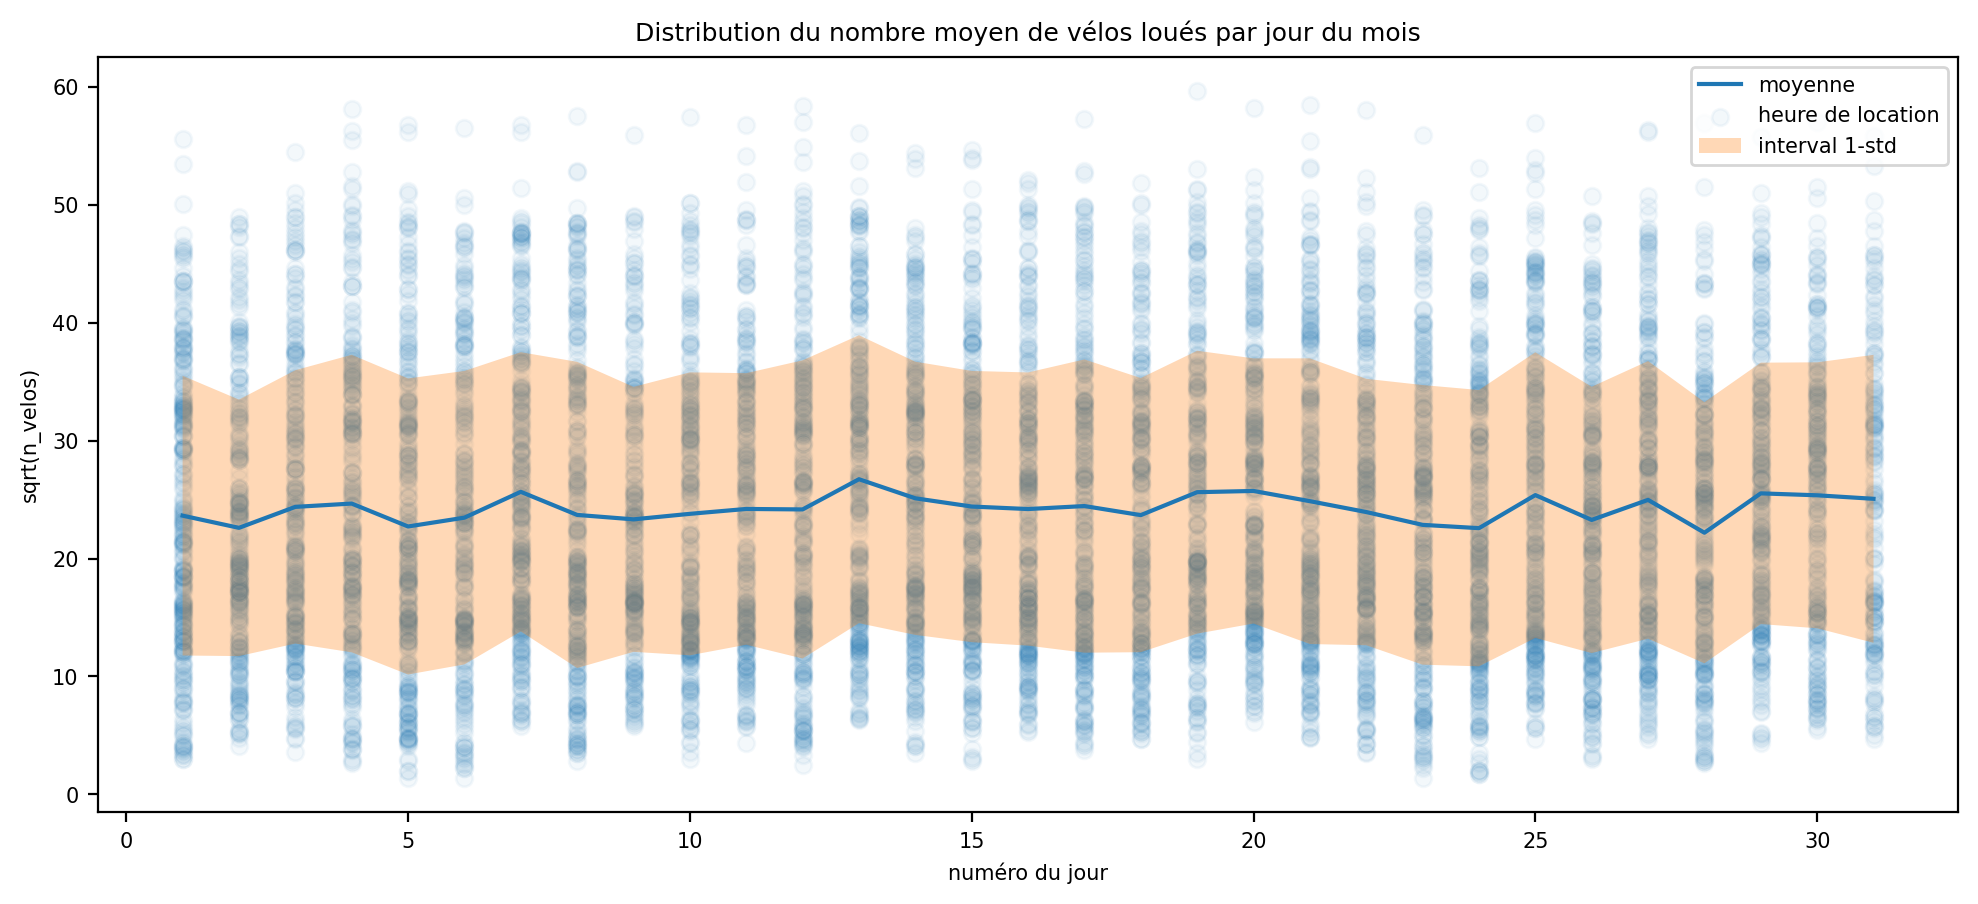

In [28]:
plt.scatter(x=df["jour"], y = df["n_velos"], alpha=0.05, label="heure de location")

df_temp = df.groupby("jour").agg({"n_velos": ["mean", "std"]}).reset_index()
mean = df_temp["n_velos"]["mean"]
std = df_temp["n_velos"]["std"]
plt.plot(df_temp["jour"], mean, label="moyenne")
plt.fill_between(df_temp["jour"], mean-std, mean+std, label="interval 1-std", alpha=0.3)
plt.legend()
plt.title("Distribution du nombre moyen de vélos loués par jour du mois")
plt.xlabel("numéro du jour")
plt.ylabel("sqrt(n_velos)")
plt.show()

Grâce à ce graphique on ne peut pas faire de conclusion sur une période des mois où il y a une forte ou faible utilisation des vélos. En effet, on remarque que le nombre moyen de vélos loués est plutôt constant dans le temps.

### Distribution moyenne du nombre de vélos loués par mois
Il est important d'analyser le mois, car en fonction du mois les conditions extérieur sont différentes et peuvent impacter l'utilisation du vélo.

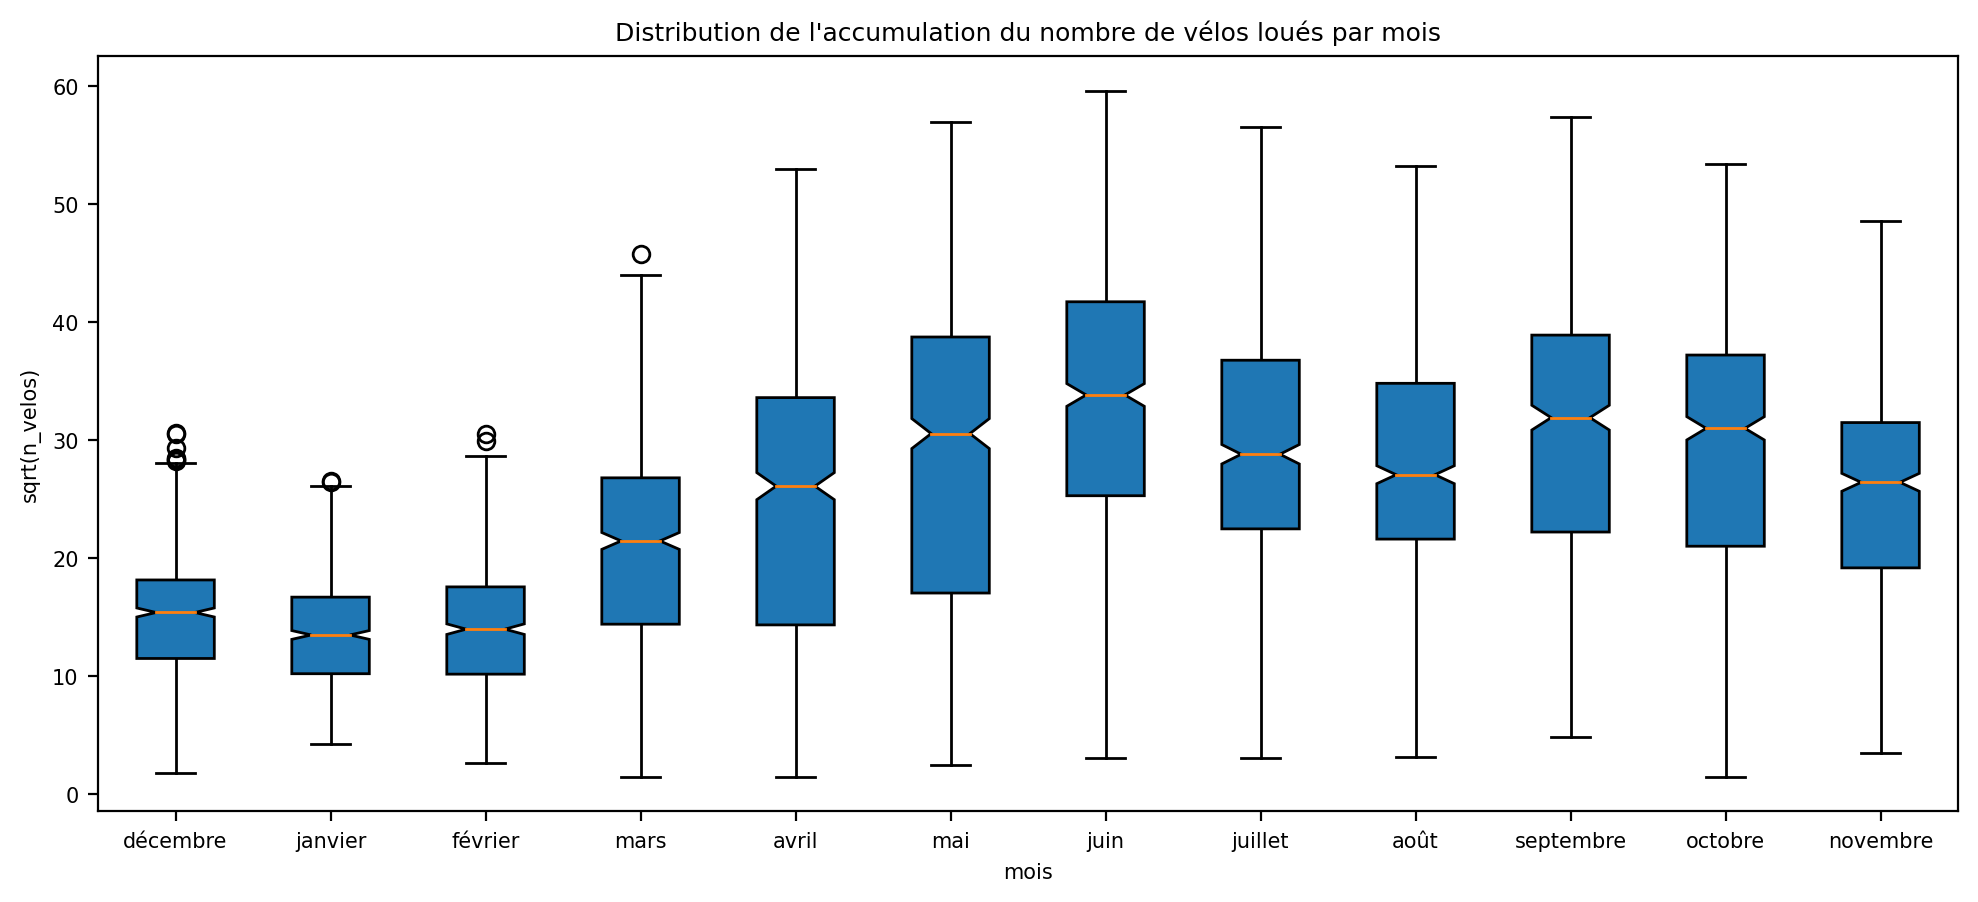

In [29]:
grps = df.groupby(by="nom_mois", sort=False)["n_velos"]
labels = grps.count().reset_index(name="count")["nom_mois"].values
grps = [grps.get_group(k) for k in grps.groups]

plt.boxplot(grps, notch=True, vert=True, patch_artist=True, labels=labels,
)
plt.title("Distribution de l'accumulation du nombre de vélos loués par mois")
plt.xlabel("mois")
plt.ylabel("sqrt(n_velos)")
plt.show()

In [30]:
df.groupby("nom_mois", sort=False).agg({"n_velos": ["count", "sum", "mean", "min", "max", "median", "std"]}).apply(lambda row: [f"{x:.1f}" for x in row])

n_velos                                       
            count      sum  mean  min   max median   std
nom_mois                                                
décembre    744.0  11101.8  14.9  1.7  30.6   15.4   5.1
janvier     744.0  10031.6  13.5  4.2  26.5   13.5   4.5
février     672.0   9453.1  14.1  2.6  30.5   14.0   5.3
mars        744.0  15507.9  20.8  1.4  45.8   21.4   8.8
avril       696.0  17243.7  24.8  1.4  53.0   26.1  11.8
mai         720.0  20488.5  28.5  2.4  57.0   30.6  13.1
juin        720.0  23970.0  33.3  3.0  59.6   33.8  11.7
juillet     744.0  21824.1  29.3  3.0  56.5   28.8  11.3
août        744.0  20719.7  27.8  3.2  53.3   27.1  10.0
septembre   624.0  19237.2  30.8  4.8  57.4   31.9  11.4
octobre     665.0  19457.7  29.3  1.4  53.5   31.0  11.1
novembre    648.0  16328.9  25.2  3.5  48.5   26.4   9.2

D'après le graphique et le Dataframe on remarque que le mois a un impact sur le nombre de vélos loués. En effet, on remarque que lors des mois d'hiver, il y a une chute de l'utilisation des vélos.

### Distribution moyenne du nombre de vélos loués par saison
On a remarqué que le mois est une variable importante pour déterminer le nombre de vélos empruntés. On peut donc se demander si la saison l'est aussi.

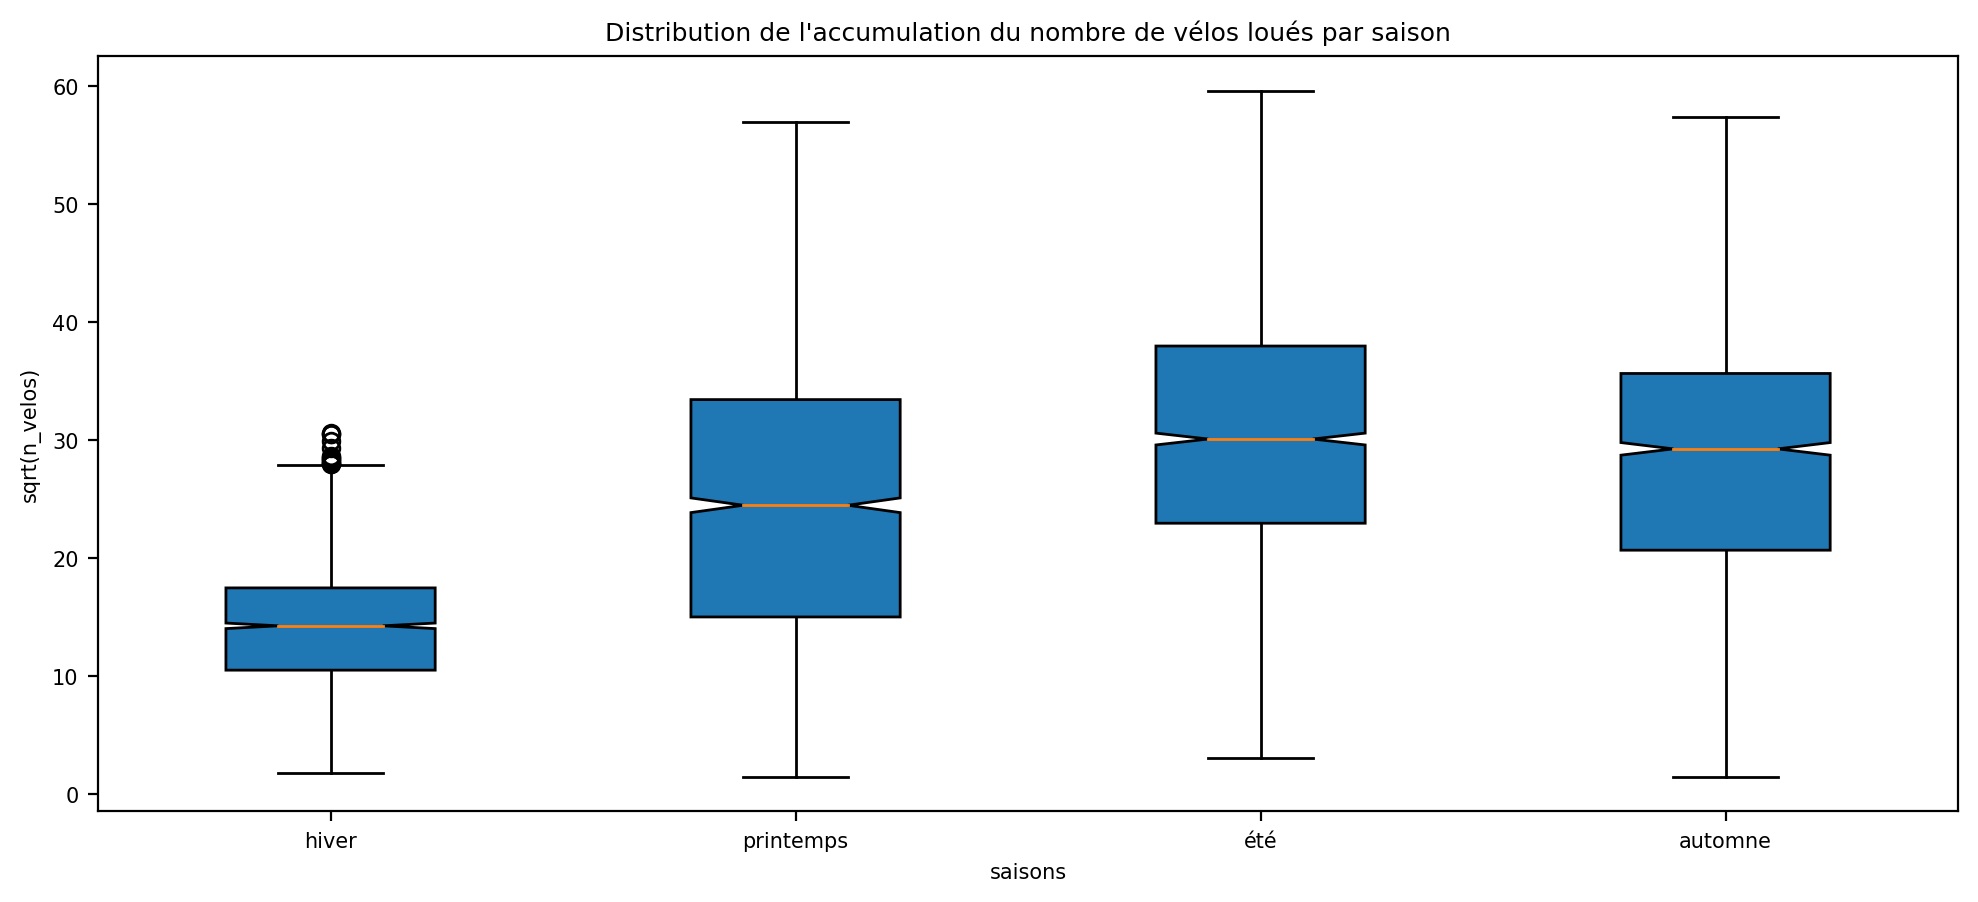

n_velos                                       
            count      sum  mean  min   max median   std
saisons                                                 
hiver      2160.0  30586.4  14.2  1.7  30.6   14.2   5.0
printemps  2160.0  53240.1  24.6  1.4  57.0   24.5  11.8
été        2208.0  66513.8  30.1  3.0  59.6   30.1  11.3
automne    1937.0  55023.8  28.4  1.4  57.4   29.3  10.8

In [31]:
grps = df.groupby("saisons", sort=False)["n_velos"]
labels = grps.count().reset_index(name="count")["saisons"].values
grps = [grps.get_group(k) for k in labels]

plt.boxplot(grps,
            notch=True,
            vert=True,
            patch_artist=True,
            labels=labels
           )
plt.title("Distribution de l'accumulation du nombre de vélos loués par saison")
plt.xlabel("saisons")
plt.ylabel("sqrt(n_velos)")
plt.show()

df.groupby("saisons", sort=False).agg({"n_velos": ["count", "sum", "mean", "min", "max", "median", "std"]}).apply(lambda row: [f"{x:.1f}" for x in row])

On met bien en évidence ici qu'il y a une chute de l'utilisation des vélos en hiver.

### Analyse des vacances

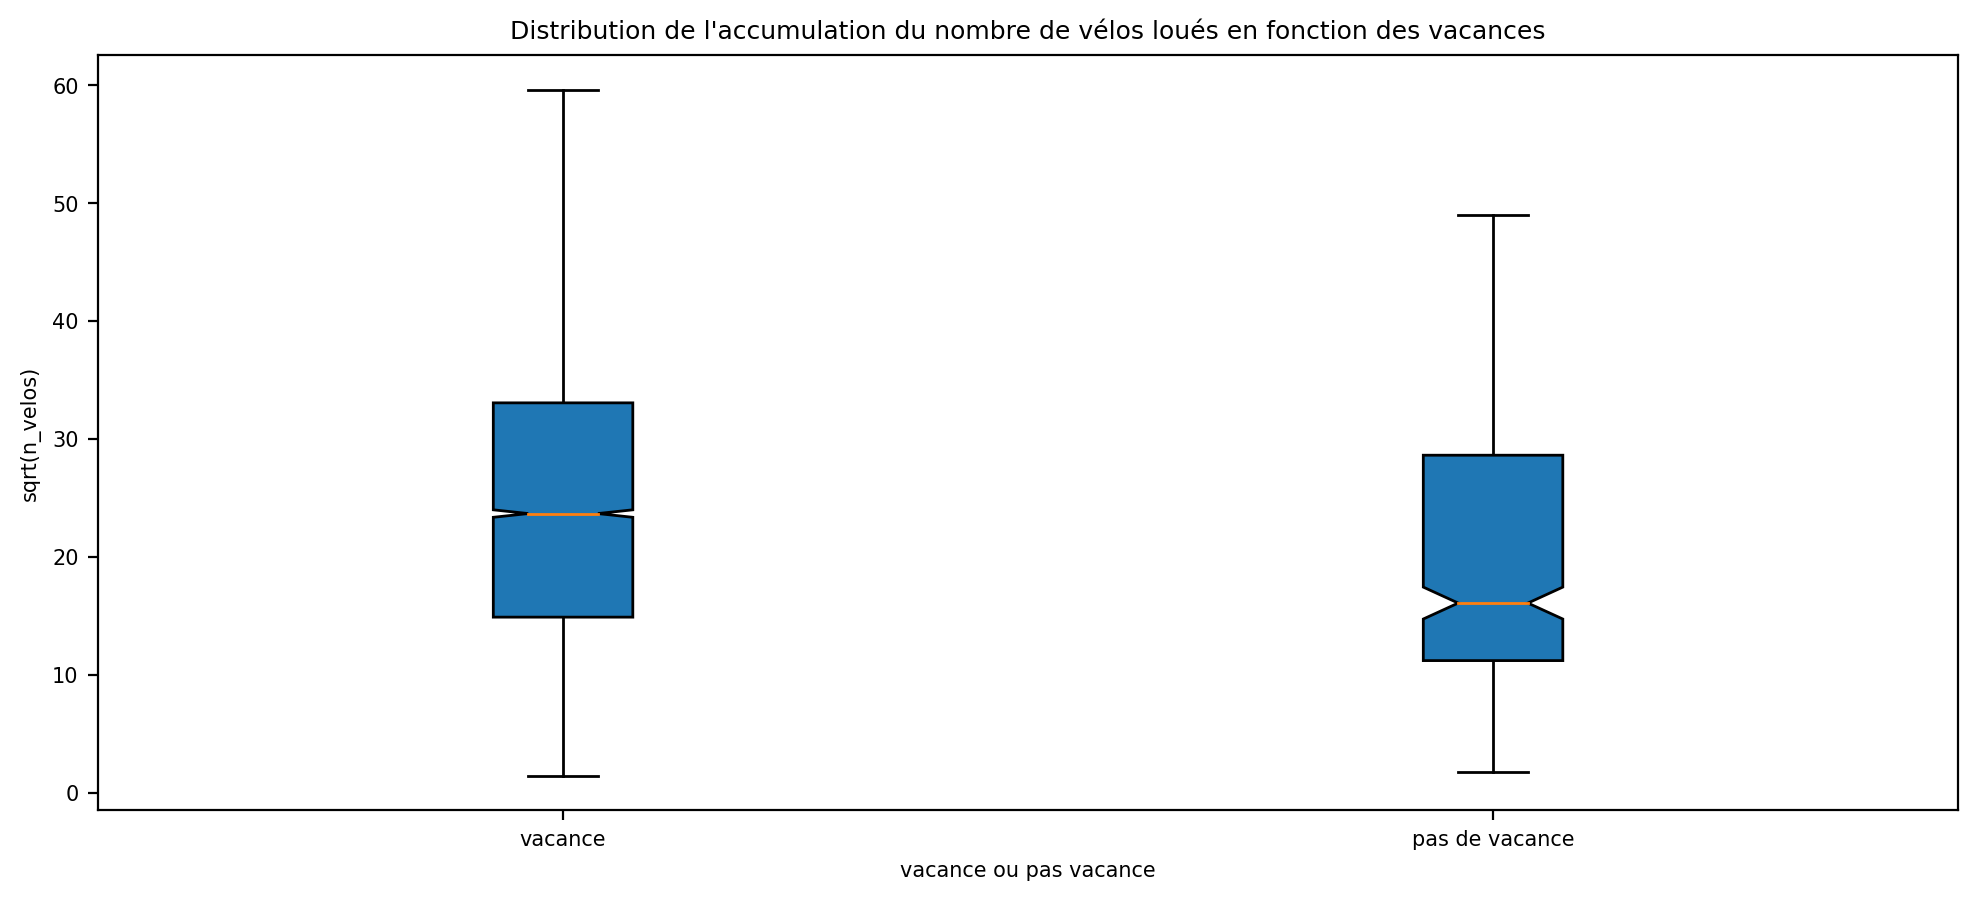

n_velos                                        
          count       sum  mean  min   max median   std
vacance                                                
0        8057.0  197273.6  24.5  1.4  59.6   23.7  11.8
1         408.0    8090.5  19.8  1.7  49.0   16.1  11.7

In [32]:
grps = df.groupby("vacance", sort=False)["n_velos"]
labels = ["vacance", "pas de vacance"]
grps = [grps.get_group(k) for k in grps.groups]

plt.boxplot(grps,
            notch=True,
            vert=True,
            patch_artist=True,
            labels=labels)
plt.title("Distribution de l'accumulation du nombre de vélos loués en fonction des vacances")
plt.xlabel("vacance ou pas vacance")
plt.ylabel("sqrt(n_velos)")
plt.show()

df.groupby("vacance", sort=False).agg({"n_velos": ["count", "sum", "mean", "min", "max", "median", "std"]}).apply(lambda row: [f"{x:.1f}" for x in row])

Cette variable est plus difficile à interpréter que les deux variables précédentes. Si on regarde la colonne sum du Dataframe, on remarque que en période de travail il y a une plus forte utilisation des vélos.

### Conclusion des colonnes temporelles
On peut conclure que la journée, si il s'agit d'un jour de travail ou du week-end, le mois et la saison sont des variables importantes pour prédire le nombre de vélos qui vont être loués.

## Caractéristiques météorologique
Dans cette partie on va se concentrer sur les colonnes restantes.

### Température & température du point de rosée

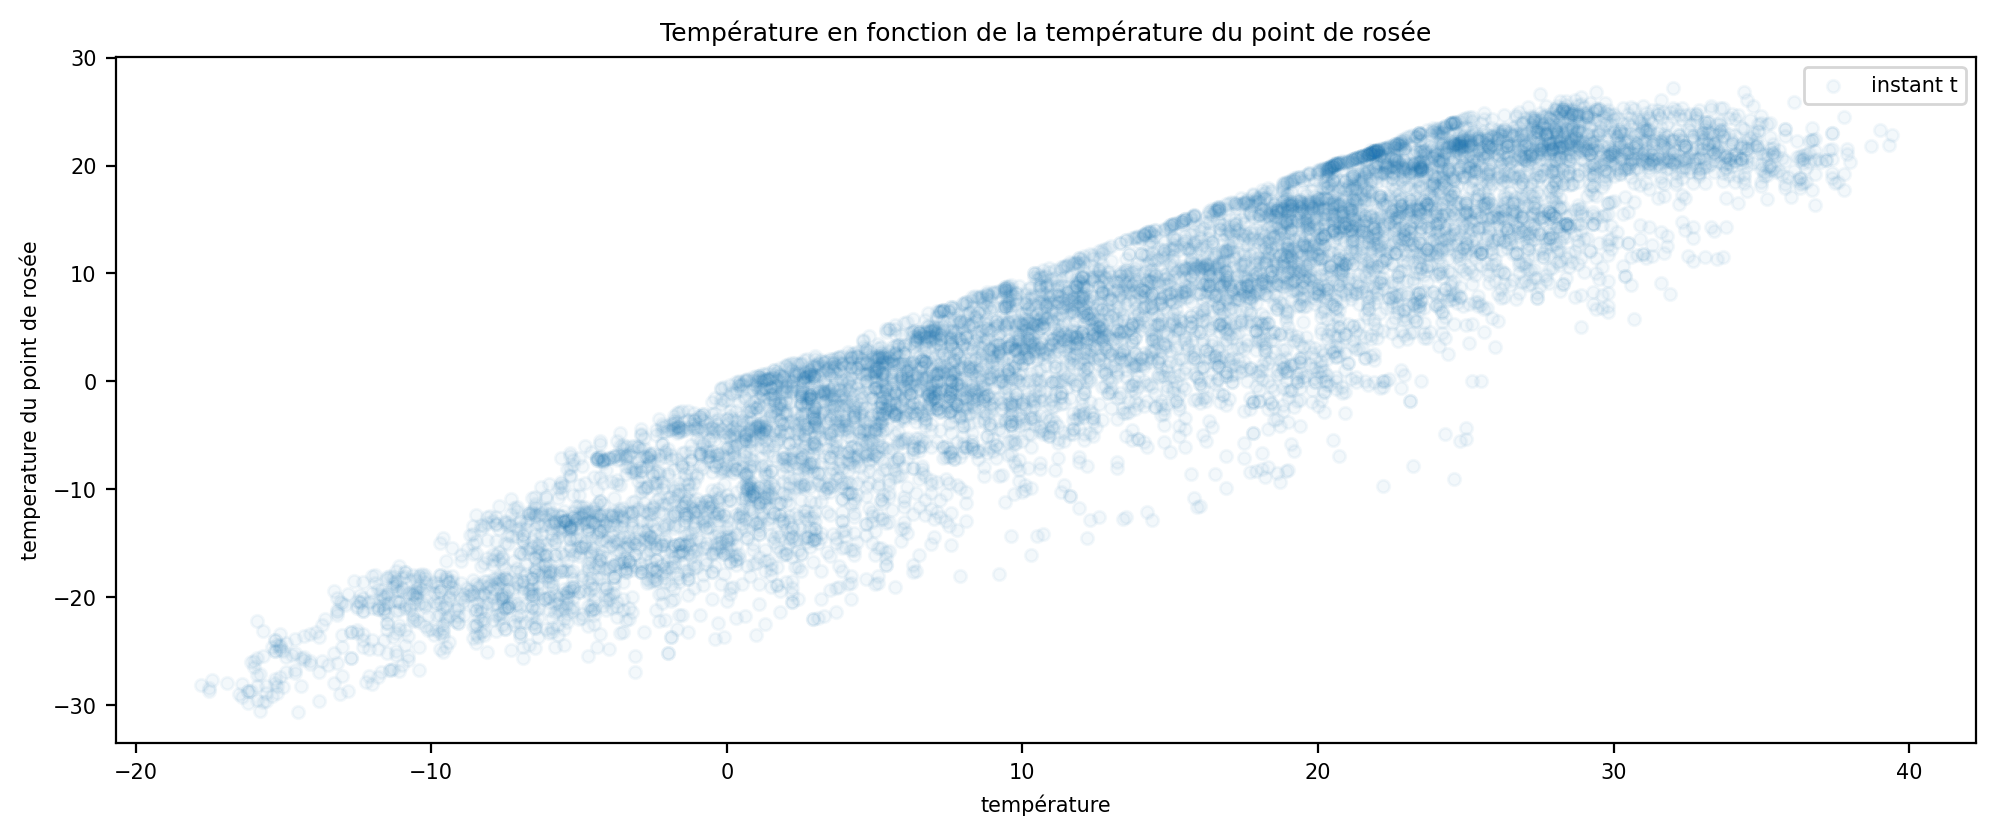

In [33]:
plt.rcParams["figure.figsize"] = [12, 10]

ax = plt.subplot2grid((2,2), (0,0), colspan=2)
df.plot(x="temp", y="rosee", kind="scatter", ax=ax, label="instant t", alpha=0.05)
ax.set_title("Température en fonction de la température du point de rosée")
ax.set_xlabel("température")
ax.set_ylabel("temperature du point de rosée")
ax.legend()

plt.show()

On remarque qu'il y a une relation linéaire entre la température et la température du point de rosée.

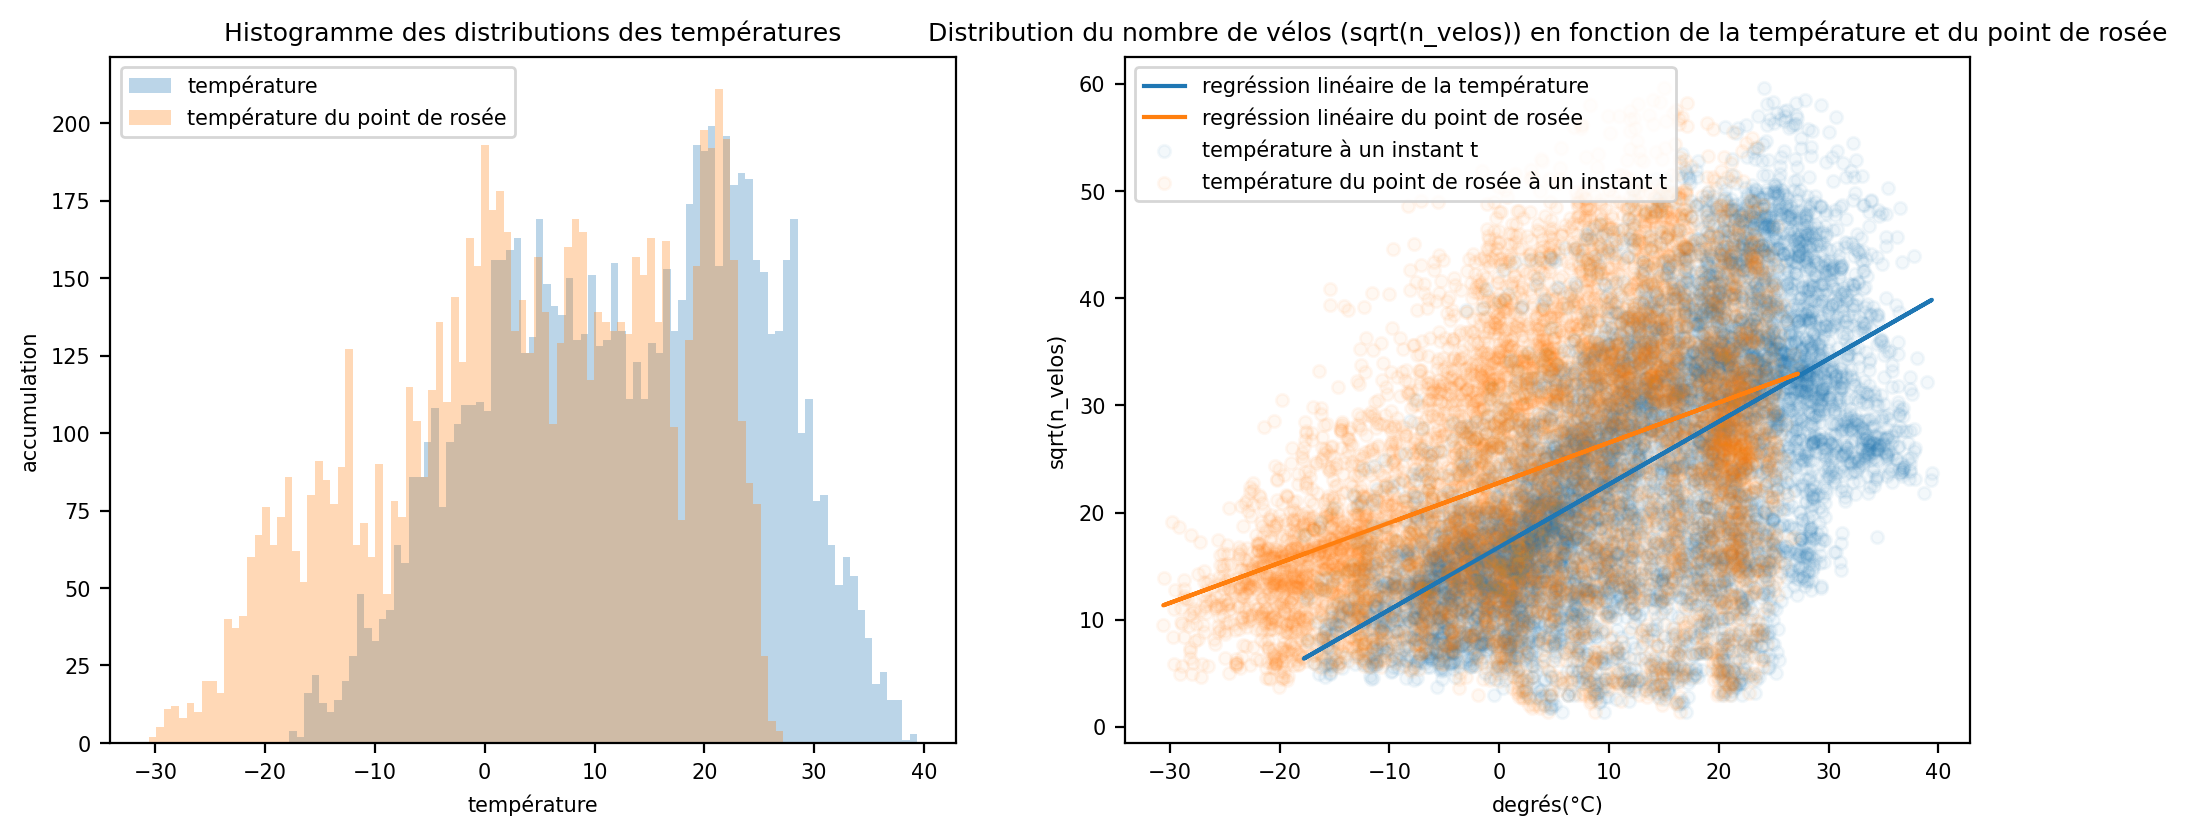

In [34]:
# Distribution des températures
ax = plt.subplot2grid((2,2), (1,0), colspan=1)
ax.hist(x=df["temp"], bins=len(df)//100, alpha=0.3, label="température")
ax.hist(x=df["rosee"], bins=len(df)//100, alpha=0.3, label="température du point de rosée")
ax.set_title("Histogramme des distributions des températures")
ax.set_xlabel("température")
ax.set_ylabel("accumulation")
ax.legend()

# Distribution du nombre de vélos loués en fonction de la température
ax = plt.subplot2grid((2,2), (1,1), colspan=1)
df.plot(x="temp", y="n_velos", kind="scatter", color="#1f77b4", alpha=0.05, label="température à un instant t", ax=ax)
df.plot(x="rosee", y="n_velos", kind="scatter", color="#ff7f0e",alpha=0.05, label="température du point de rosée à un instant t", ax=ax)

x, y = df["temp"], df["n_velos"]
m, b = np.polyfit(x, y, 1)
ax.plot(x, m*x+b, color="#1f77b4", label="regréssion linéaire de la température")
x, y = df["rosee"], df["n_velos"]
m, b = np.polyfit(x, y, 1)
ax.plot(x, m*x+b, color="#FF7f0e", label="regréssion linéaire du point de rosée")

ax.set_title("Distribution du nombre de vélos (sqrt(n_velos)) en fonction de la température et du point de rosée")
ax.set_xlabel("degrés(°C)")
ax.set_ylabel("sqrt(n_velos)")
ax.legend()

plt.rcParams["figure.figsize"] = [12, 5]
plt.show()

On remarque qu'il y a une distribution gaussienne des températures. De plus on remarque que plus la température est haute, plus le nombre de vélos empruntés augmente.

### Humidité

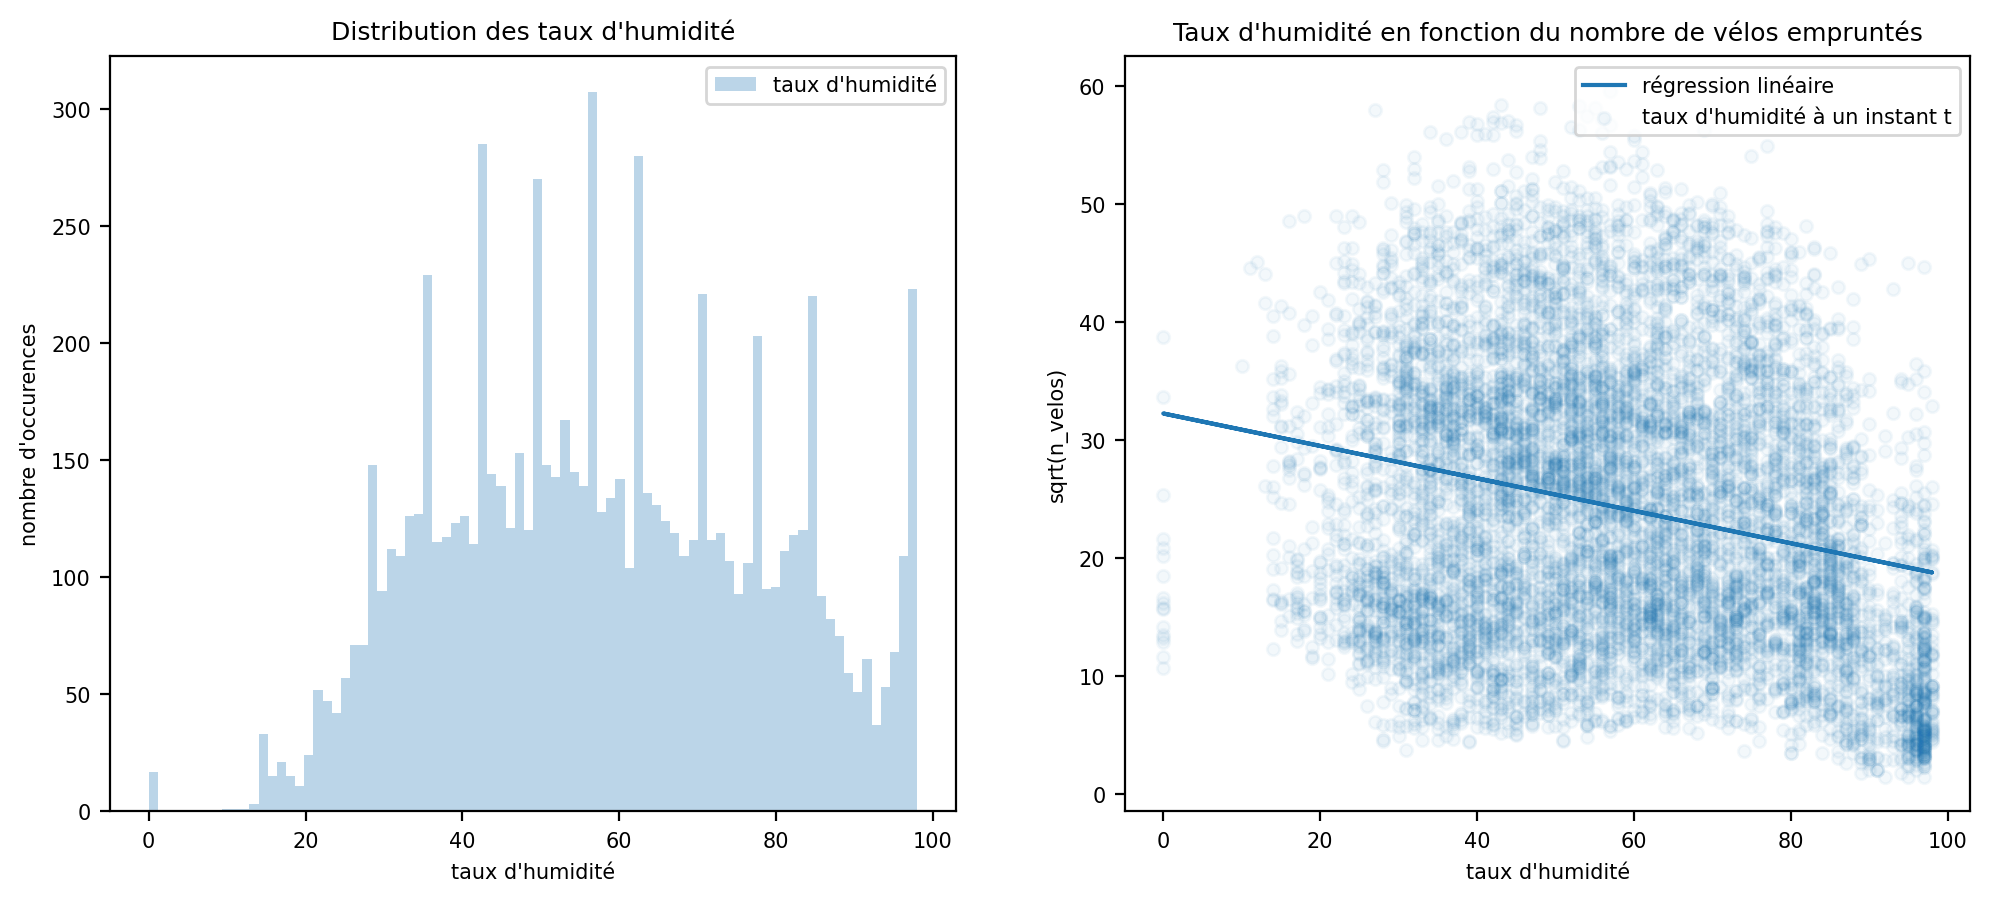

In [35]:
# Distribution des taux d'humidité
ax = plt.subplot2grid((1,2), (0,0), colspan=1)
ax.hist(x=df["humidite"], bins=len(df)//100, alpha=0.3, label="taux d'humidité")
ax.set_title("Distribution des taux d'humidité")
ax.set_xlabel("taux d'humidité")
ax.set_ylabel("nombre d'occurences")
ax.legend()

# Taux d'humidité en fonction du nombre de vélos loués.
ax = plt.subplot2grid((1,2), (0,1), colspan=1)
df.plot(x="humidite", y="n_velos", kind="scatter", alpha=0.05, label="taux d'humidité à un instant t", ax=ax)
x, y = df["humidite"], df["n_velos"]
m, b = np.polyfit(x, y, 1)
ax.plot(x, m*x+b, label="régression linéaire")
ax.set_title("Taux d'humidité en fonction du nombre de vélos empruntés")
ax.set_xlabel("taux d'humidité")
ax.set_ylabel("sqrt(n_velos)")
ax.legend()

plt.show()

Sur la graphique de gauche, on observe que la distribution des taux d'humidité est plutôt gaussienne. Sur le graphique de droite on remarque que plus le taux d'humidité est élevé mois il y a de vélos empruntés.<br>
### Vent

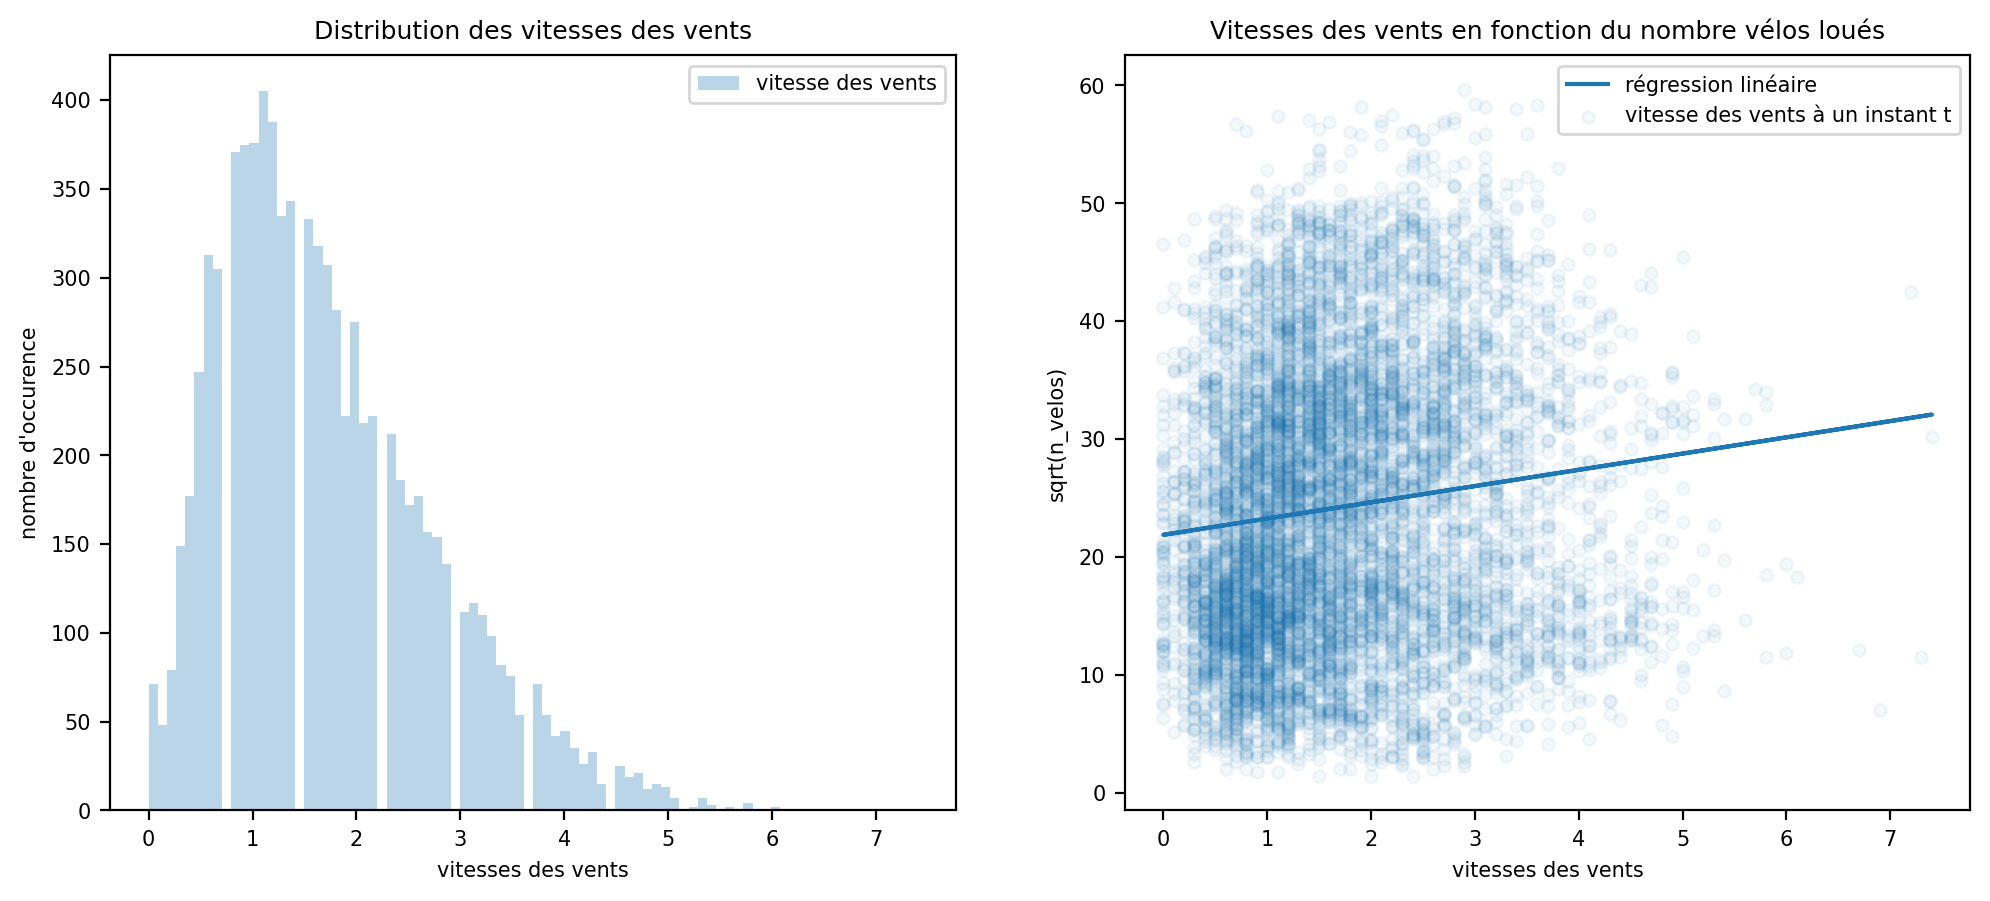

In [36]:
# Distribution des vitesses des vents
ax = plt.subplot2grid((1,2), (0,0), colspan=1)
ax.hist(x=df["vent"], bins=len(df)//100, alpha=0.3, label="vitesse des vents")
ax.set_title("Distribution des vitesses des vents")
ax.set_xlabel("vitesses des vents")
ax.set_ylabel("nombre d'occurence")
ax.legend()

# Vitesses des vents en fonction du nombre de vélos loués
ax = plt.subplot2grid((1,2),(0,1),colspan=1)
df.plot(x="vent", y="n_velos", kind="scatter", alpha=0.05, label="vitesse des vents à un instant t", ax=ax)
x, y = df["vent"], df["n_velos"]
m, b = np.polyfit(x, y, 1)
ax.plot(x, m*x+b, label="régression linéaire")
ax.set_title("Vitesses des vents en fonction du nombre vélos loués")
ax.set_xlabel("vitesses des vents")
ax.set_ylabel("sqrt(n_velos)")
ax.legend()

plt.show()

On remarque que l'on a une distribution asymétrique vers la droite, une transformation est nécessaire afin d'avoir une distribution gaussienne.<br>
De plus, on remarque que le nombre de vélos empruntés augmente lorsque la vitesse des vents augmente. Cette observation est surprenante, car la vitesse des vents peut avoir un impact sur le déplacement d'un cycliste, au sens rendre l'effort de pédaler plus difficile. Nous allons refaire ce graphique après transformation de la distribution

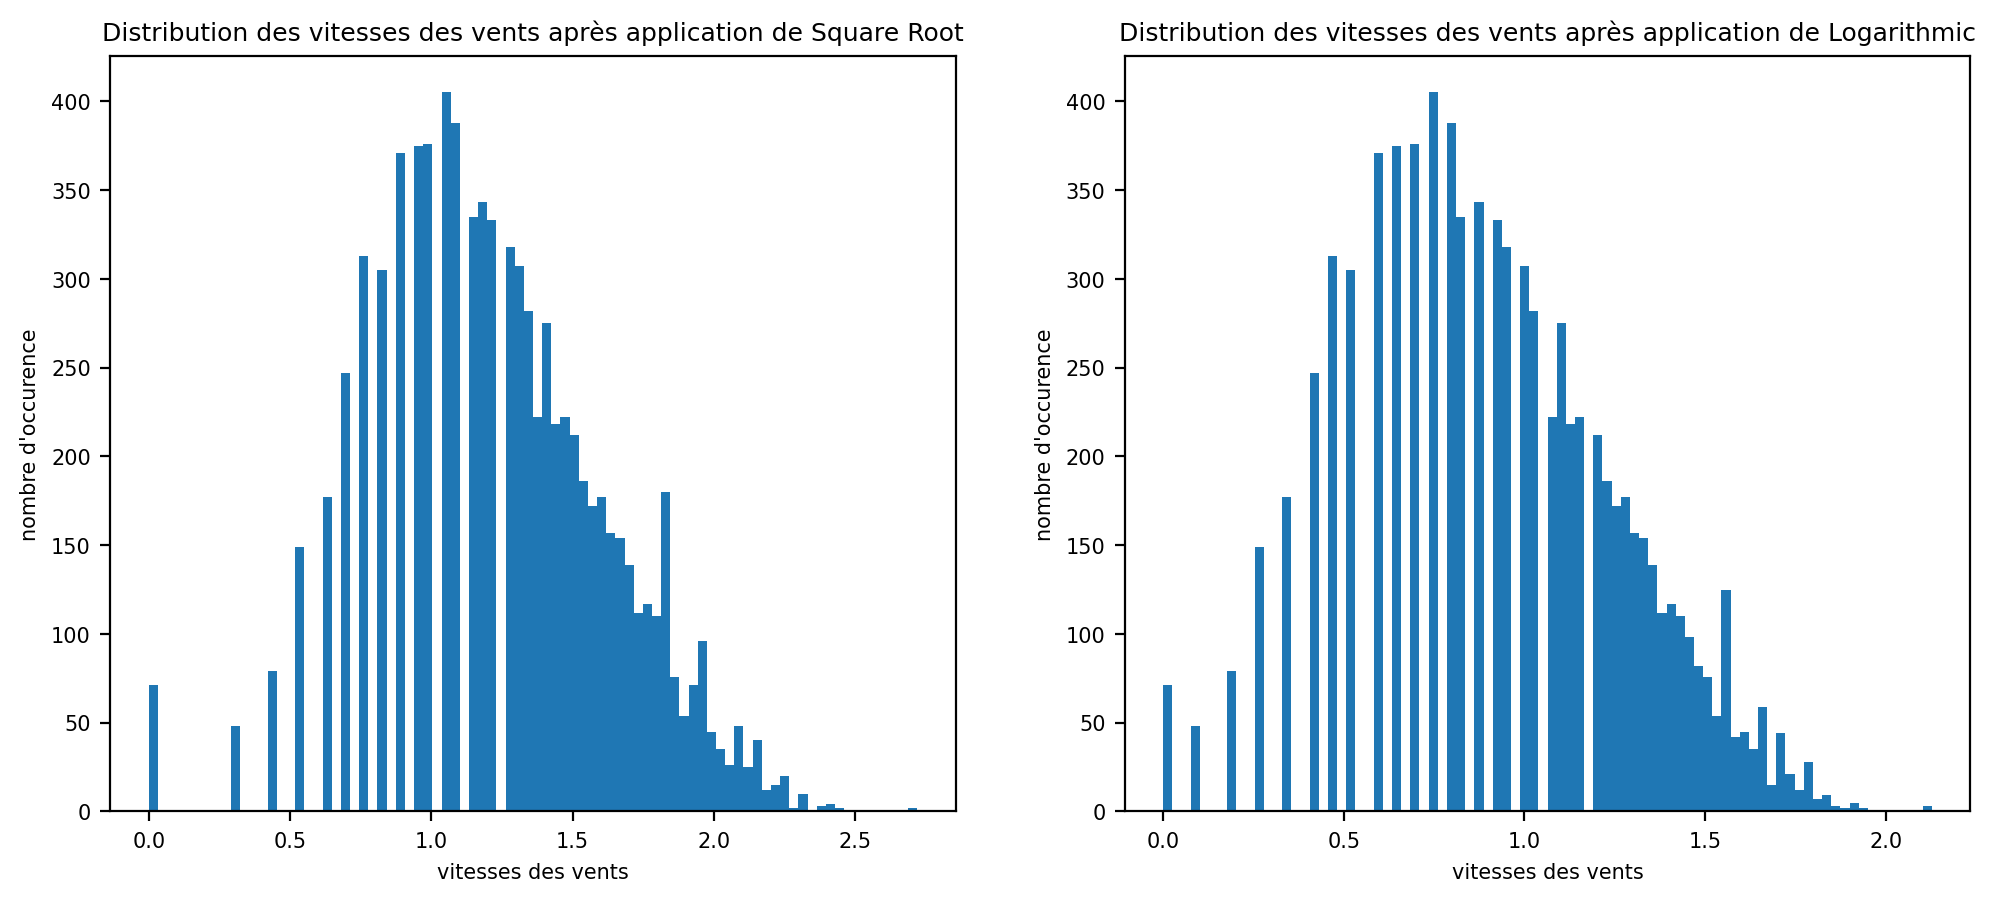

In [37]:
fig, axs = plt.subplots(1,2)

# Square Root
axs[0].hist(x=np.sqrt(df["vent"]), bins = len(df)//100)
axs[0].set_title("Distribution des vitesses des vents après application de Square Root")
axs[0].set_xlabel("vitesses des vents")
axs[0].set_ylabel("nombre d'occurence")

# Logarithmic
axs[1].hist(x=np.log(df["vent"]+1), bins = len(df)//100)
axs[1].set_title("Distribution des vitesses des vents après application de Logarithmic")
axs[1].set_xlabel("vitesses des vents")
axs[1].set_ylabel("nombre d'occurence")

plt.show()

Dans les cas on a une distribution gaussienne. On choisit la transformation logarithmique pour varier.

In [38]:
df["vent"] = np.log(df["vent"]+1)

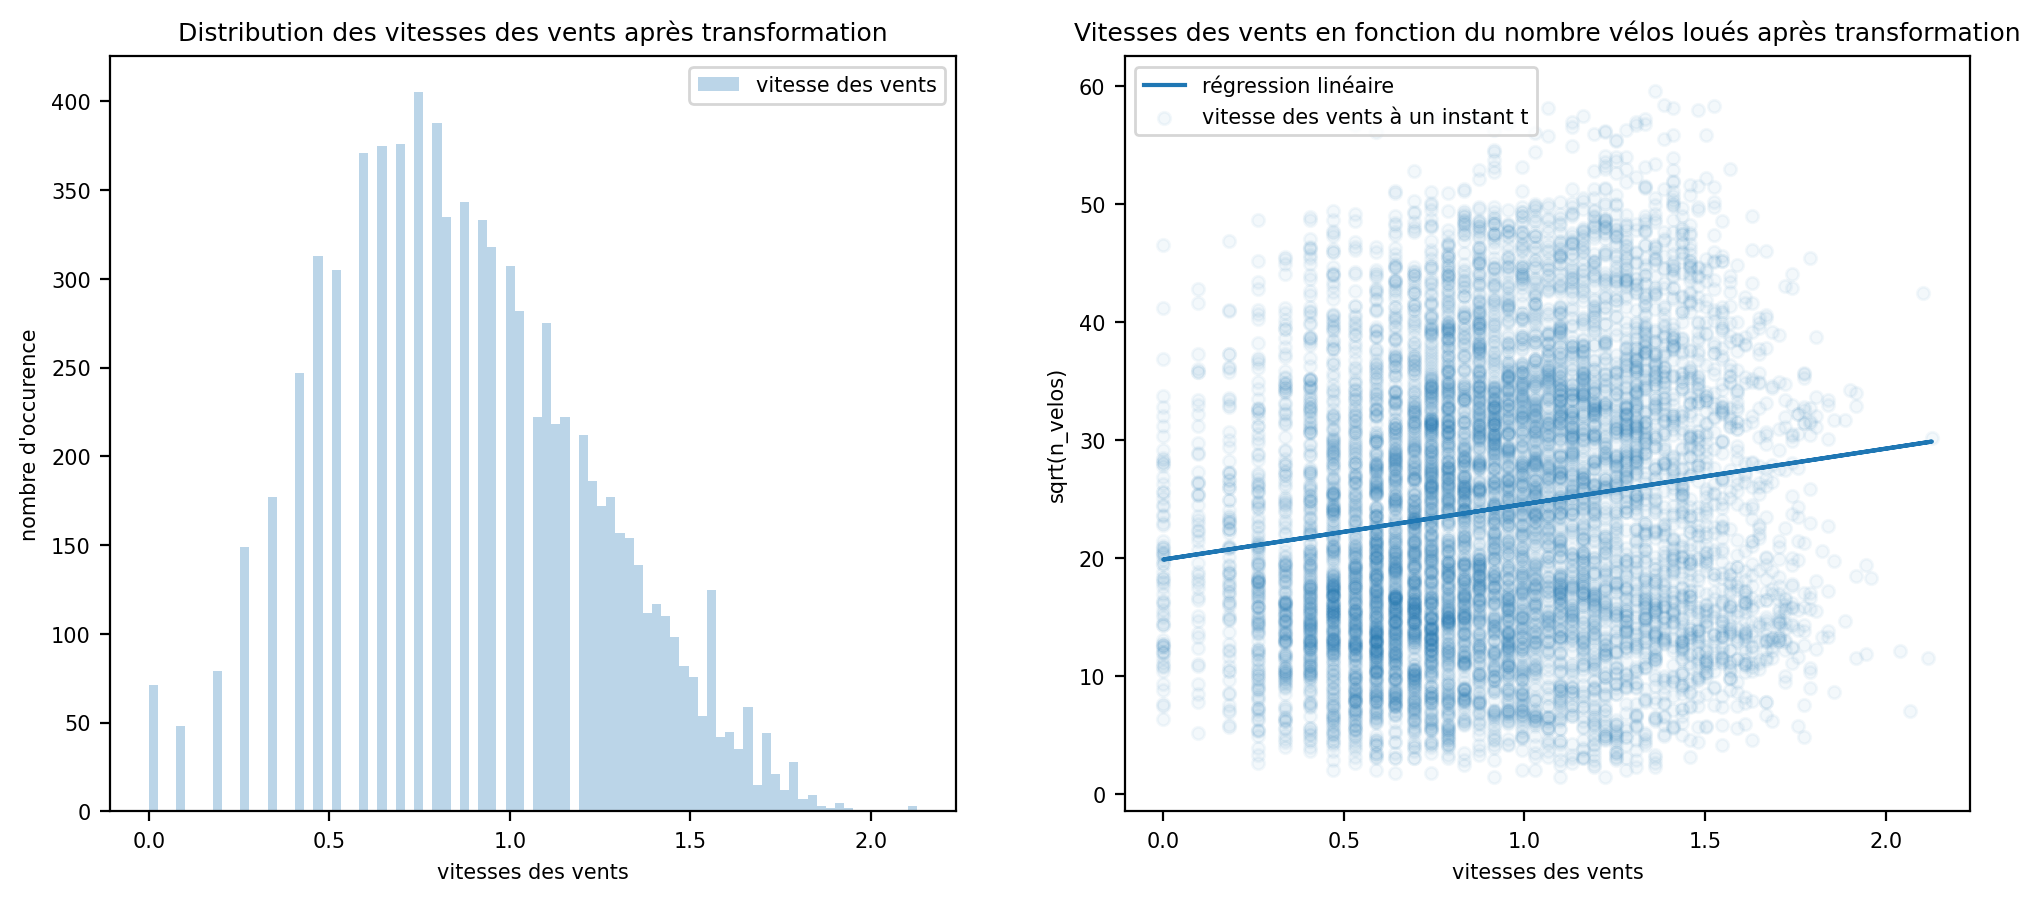

In [39]:
# Distribution des vitesses des vents
ax = plt.subplot2grid((1,2), (0,0), colspan=1)
ax.hist(x=df["vent"], bins=len(df)//100, alpha=0.3, label="vitesse des vents")
ax.set_title("Distribution des vitesses des vents après transformation")
ax.set_xlabel("vitesses des vents")
ax.set_ylabel("nombre d'occurence")
ax.legend()

# Vitesses des vents en fonction du nombre de vélos loués
ax = plt.subplot2grid((1,2),(0,1),colspan=1)
df.plot(x="vent", y="n_velos", kind="scatter", alpha=0.05, label="vitesse des vents à un instant t", ax=ax)
x, y = df["vent"], df["n_velos"]
m, b = np.polyfit(x, y, 1)
ax.plot(x, m*x+b, label="régression linéaire")
ax.set_title("Vitesses des vents en fonction du nombre vélos loués après transformation")
ax.set_xlabel("vitesses des vents")
ax.set_ylabel("sqrt(n_velos)")
ax.legend()

plt.show()

On remarque que le nombre de vélos utilisés augmente lorsque la vitesse des vents augemte. On peut émettre l'hypothèse qu'il s'agit de vents frais, ce qui fait que c'est plus agréable pour les cyclistes qui fournissent un effort physique.<br>
### Visibilité

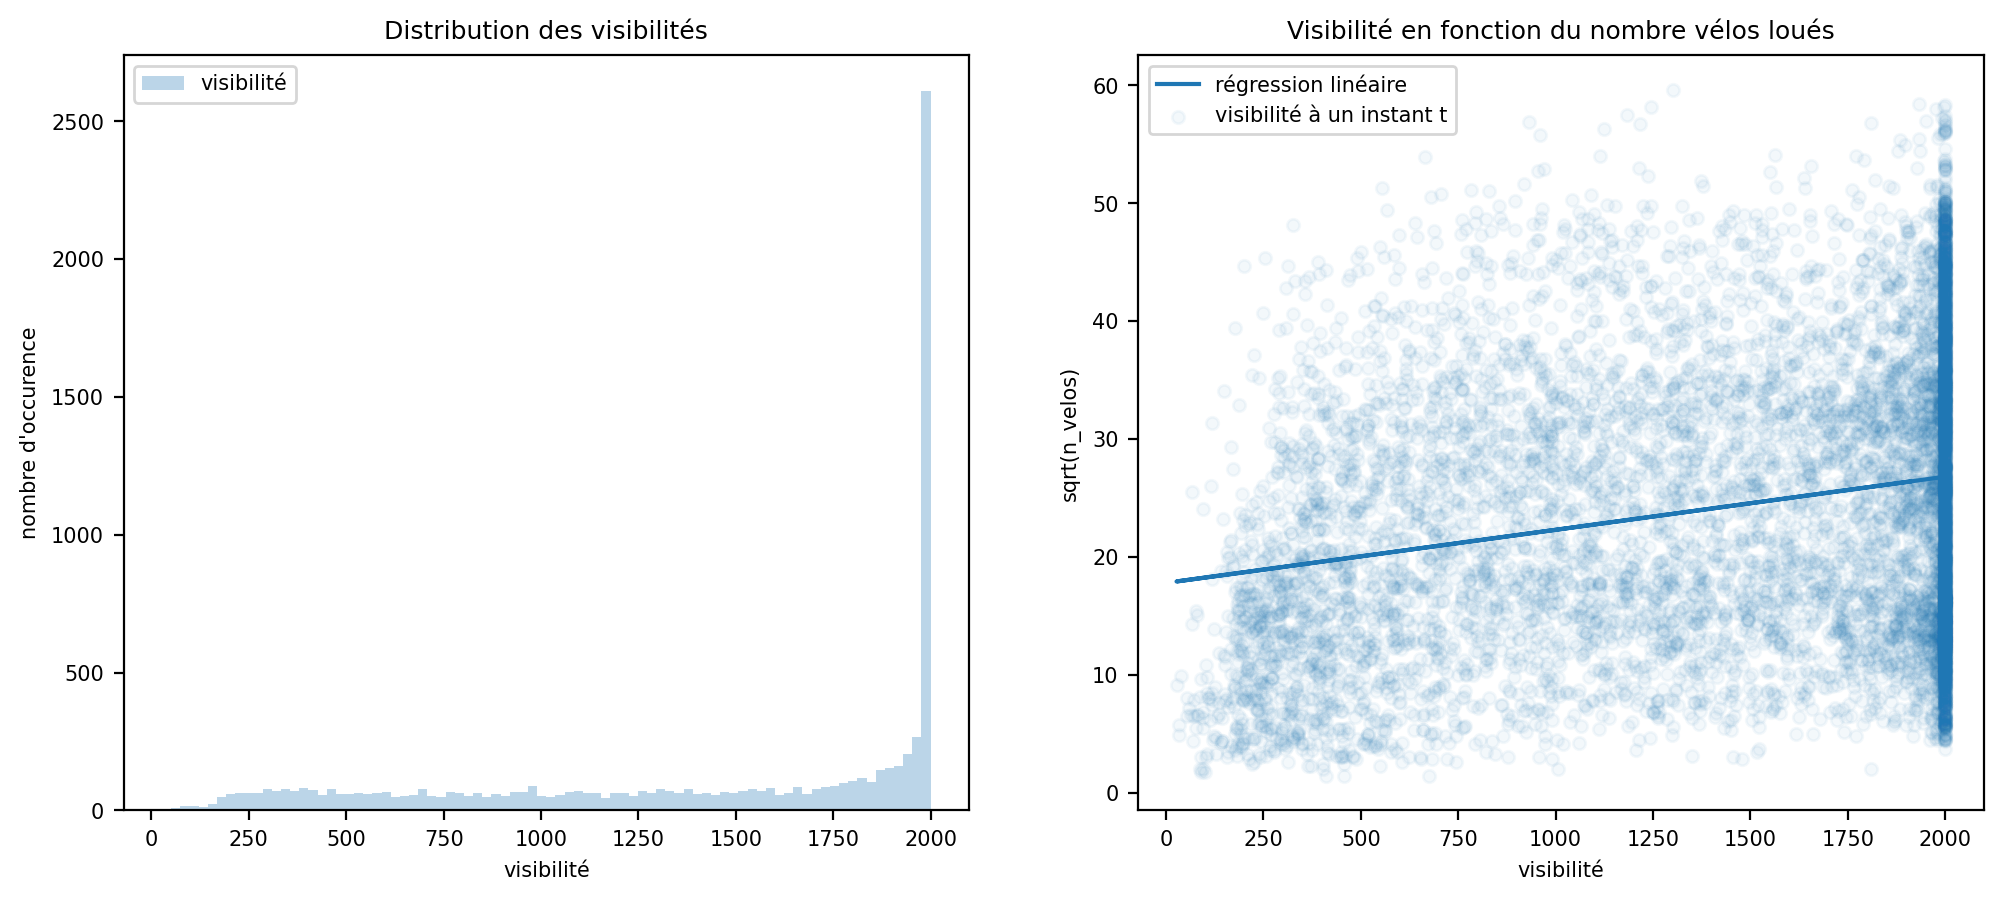

In [40]:
# Distribution des visibilités
ax = plt.subplot2grid((1,2), (0,0), colspan=1)
ax.hist(x=df["visibilite"], bins=len(df)//100, alpha=0.3, label="visibilité")
ax.set_title("Distribution des visibilités")
ax.set_xlabel("visibilité")
ax.set_ylabel("nombre d'occurence")
ax.legend()

# Vibilité en fonction du nombre de vélos loués
ax = plt.subplot2grid((1,2),(0,1),colspan=1)
df.plot(x="visibilite", y="n_velos", kind="scatter", alpha=0.05, label="visibilité à un instant t", ax=ax)
x, y = df["visibilite"], df["n_velos"]
m, b = np.polyfit(x, y, 1)
ax.plot(x, m*x+b, label="régression linéaire")
ax.set_title("Visibilité en fonction du nombre vélos loués")
ax.set_xlabel("visibilité")
ax.set_ylabel("sqrt(n_velos)")
ax.legend()

plt.show()

Le graphique de gauche nous montre que la visibilité par défaut est de 2000. On peut donc en conclure que la majorité du temps il y a une bonne visibilité sur Séoul. Sur le graphique de droite, on remarque que le nombre de vélos loués diminue lorsque la visibilité diminue. Cela est cohérent, car faible visibilité empêche de pédaler en sécurité.<br>
### Radiation solaire

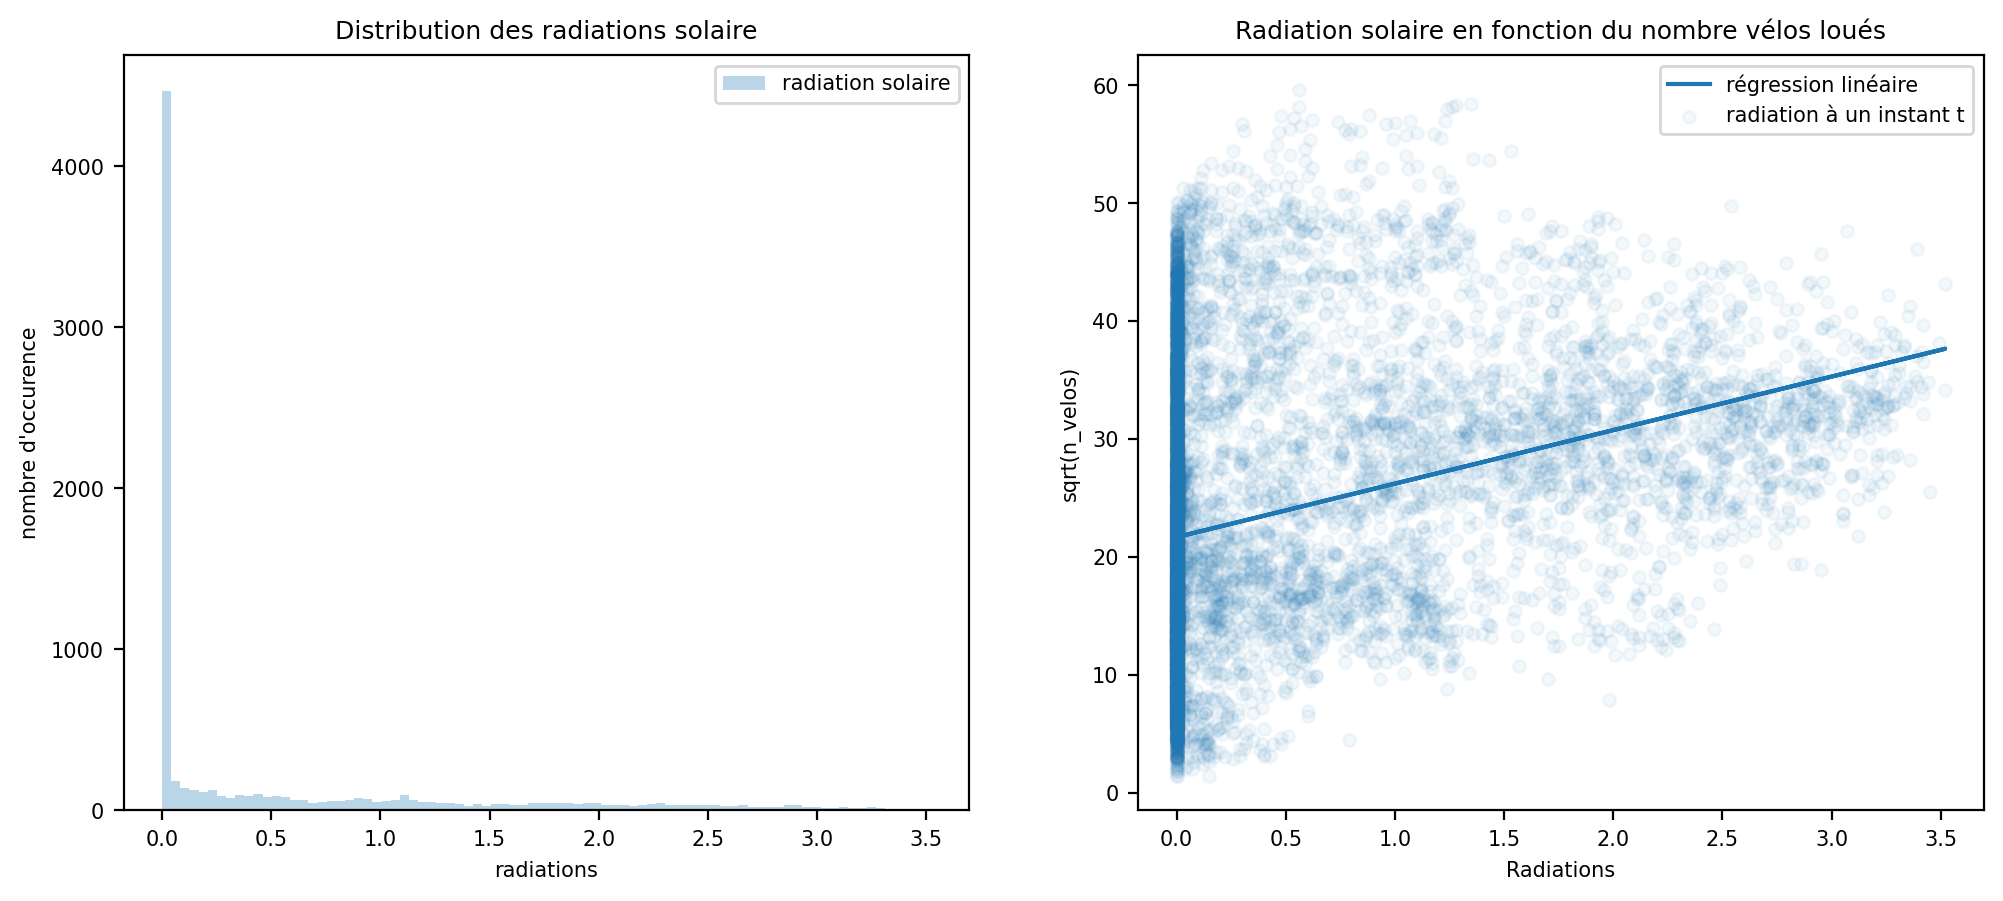

In [41]:
# Distribution des visibilités
ax = plt.subplot2grid((1,2), (0,0), colspan=1)
ax.hist(x=df["soleil"], bins=len(df)//100, alpha=0.3, label="radiation solaire")
ax.set_title("Distribution des radiations solaire")
ax.set_xlabel("radiations")
ax.set_ylabel("nombre d'occurence")
ax.legend()

# Vibilité en fonction du nombre de vélos loués
ax = plt.subplot2grid((1,2),(0,1),colspan=1)
df.plot(x="soleil", y="n_velos", kind="scatter", alpha=0.05, label="radiation à un instant t", ax=ax)
x, y = df["soleil"], df["n_velos"]
m, b = np.polyfit(x, y, 1)
ax.plot(x, m*x+b, label="régression linéaire")
ax.set_title("Radiation solaire en fonction du nombre vélos loués")
ax.set_xlabel("Radiations")
ax.set_ylabel("sqrt(n_velos)")
ax.legend()

plt.show()

Du graphique de gauche on en déduit que les radiations solaire sont le plus souvent à zéro, ce qui signifie qu'il n'y a pas de soleil. De plus, pour les radiations non nuls, on remarque qu'il y a une asymétrie vers la droite, ce qui implique une transformation. Le graphique de droite nous montre que le nombre de vélos loués augmente avec les radiations.

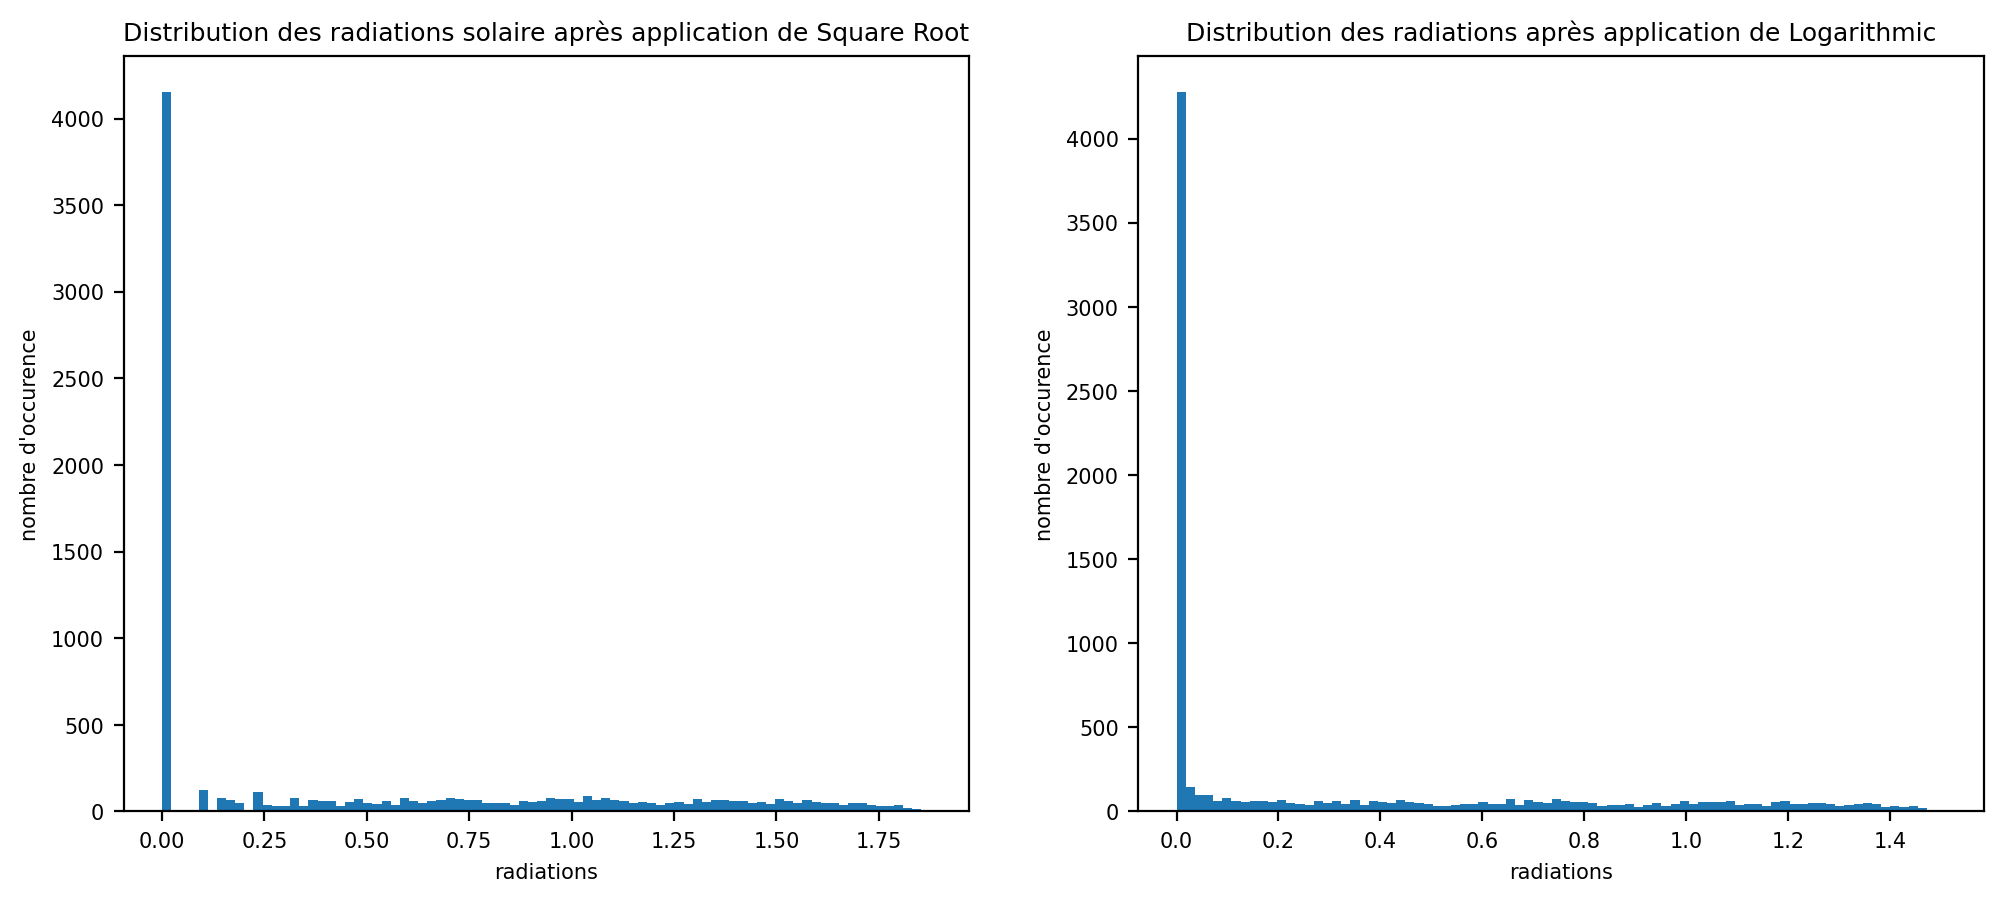

In [42]:
fig, axs = plt.subplots(1,2)

# Square Root
axs[0].hist(x=np.sqrt(df["soleil"]), bins = len(df)//100)
axs[0].set_title("Distribution des radiations solaire après application de Square Root")
axs[0].set_xlabel("radiations")
axs[0].set_ylabel("nombre d'occurence")

# Logarithmic
axs[1].hist(x=np.log(df["soleil"]+1), bins = len(df)//100)
axs[1].set_title("Distribution des radiations après application de Logarithmic")
axs[1].set_xlabel("radiations")
axs[1].set_ylabel("nombre d'occurence")

plt.show()

On va appliquer une distribution Sqare Root, car on a une meilleure distribution des radiations non nuls et on a un écart entre les valeurs nuls et non nuls.

In [43]:
df["soleil"] = np.sqrt(df["soleil"])

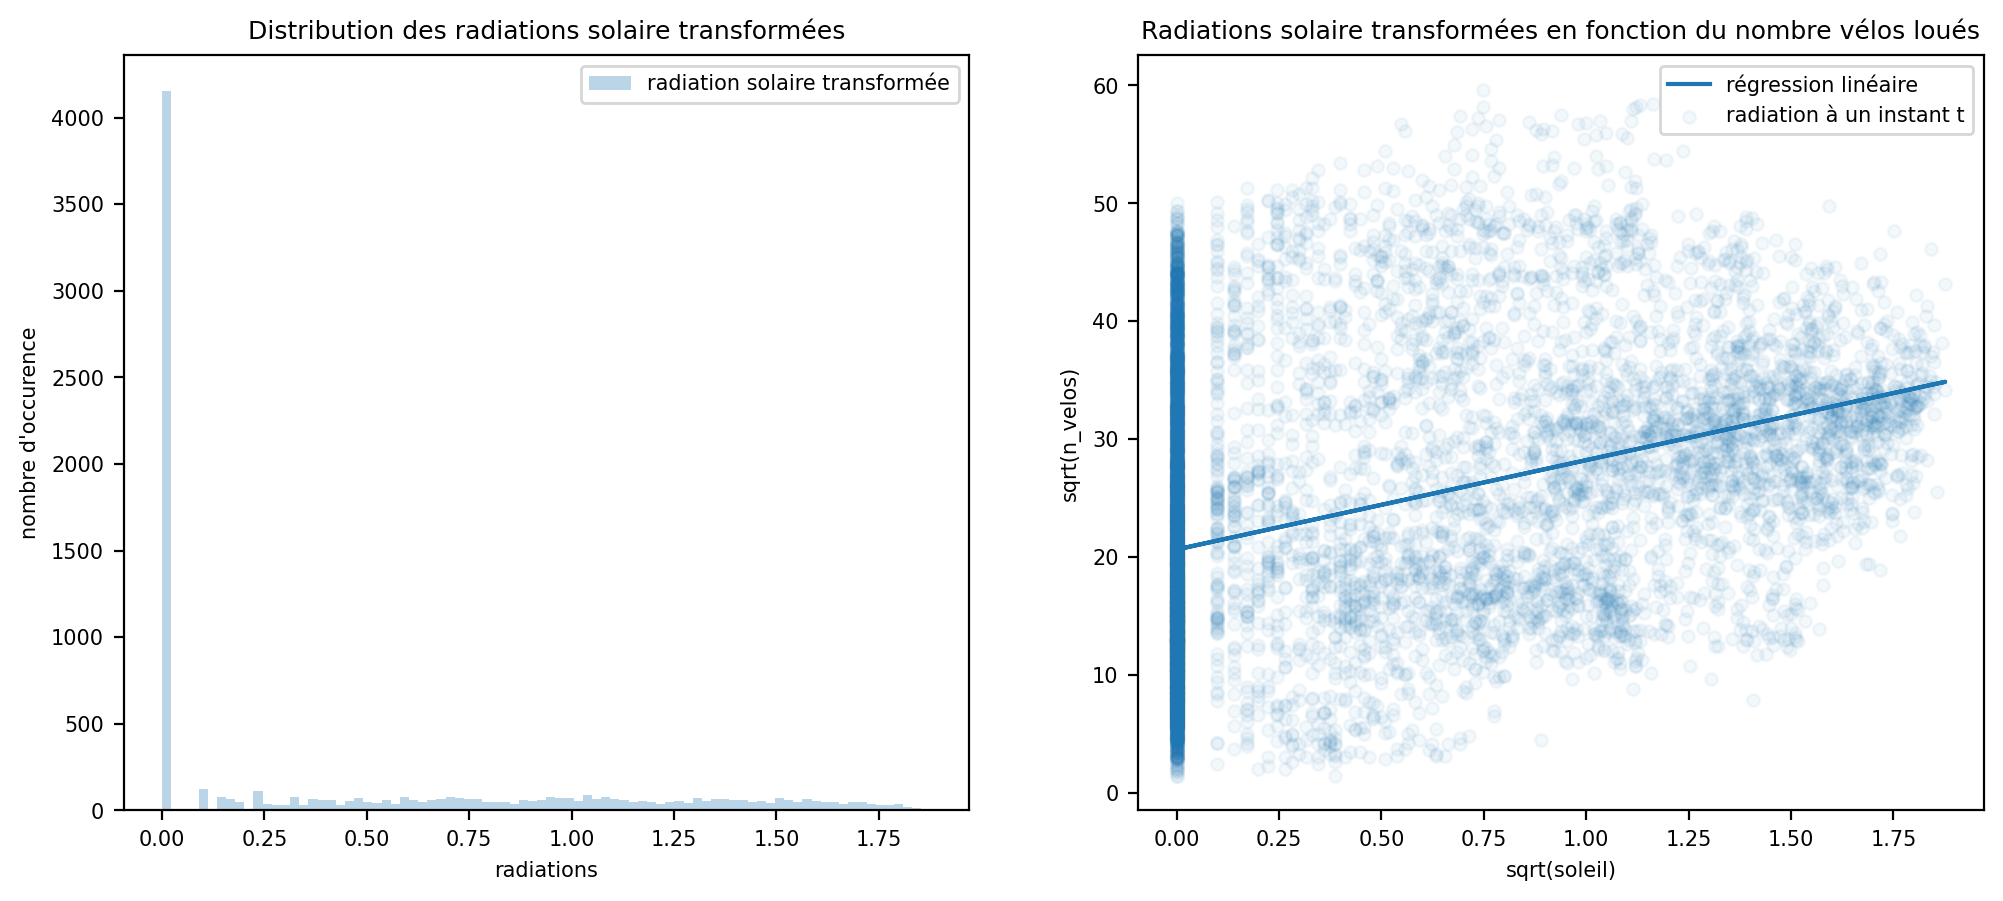

In [44]:
# Distribution des visibilités
ax = plt.subplot2grid((1,2), (0,0), colspan=1)
ax.hist(x=df["soleil"], bins=len(df)//100, alpha=0.3, label="radiation solaire transformée")
ax.set_title("Distribution des radiations solaire transformées")
ax.set_xlabel("radiations")
ax.set_ylabel("nombre d'occurence")
ax.legend()

# Vibilité en fonction du nombre de vélos loués
ax = plt.subplot2grid((1,2),(0,1),colspan=1)
df.plot(x="soleil", y="n_velos", kind="scatter", alpha=0.05, label="radiation à un instant t", ax=ax)
x, y = df["soleil"], df["n_velos"]
m, b = np.polyfit(x, y, 1)
ax.plot(x, m*x+b, label="régression linéaire")
ax.set_title("Radiations solaire transformées en fonction du nombre vélos loués")
ax.set_xlabel("sqrt(soleil)")
ax.set_ylabel("sqrt(n_velos)")
ax.legend()

plt.show()

In [45]:
df.head(2)

n_velos  heure  temp  humidite      vent  visibilite  rosee  soleil  \
0  15.937377      0  -5.2        37  1.163151        2000  -17.6     0.0   
1  14.282857      1  -5.5        38  0.587787        2000  -17.6     0.0   

   pluie  neige saisons  vacance  annee  nom_mois  jour nom_jour_sem  \
0    0.0    0.0   hiver        0   2017  décembre     1     vendredi   
1    0.0    0.0   hiver        0   2017  décembre     1     vendredi   

   jour_sem  jour_travail  
0         4             1  
1         4             1